In [1]:
import numpy as np
import pandas as pd

import kaggleSurvey as pf

# 아래는 로컬에 설치해야할 library들임. 없는 경우에는 따로 설치해주세요.
# import matplotlib as mpl
# mpl.use('Agg')
# import matplotlib.pylab as plt
# import seaborn as sns
# sns.set()
# sns.set_style("whitegrid")
# sns.set_color_codes()

pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', -1)

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

/Users/misfits/Documents/workplace/kaggle-survey-competition/Danial/kaggleSurvey.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<d

    기본 조건은 아래와 같은 구조여야 한다.

    ├── Project_Root
    │   ├── 2018Ksurvey.ipynb
    │   ├── asset
    │   │   ├── description_2017.txt
    │   │   ├── description_2018.txt
    │   │   ├── kaggle-survey-2017
    │   │   │   ├── RespondentTypeREADME.txt
    │   │   │   ├── conversionRates.csv
    │   │   │   ├── freeformResponses.csv
    │   │   │   ├── multipleChoiceResponses.csv
    │   │   │   └── schema.csv
    │   │   ├── kaggle-survey-2018
    │   │   │   ├── SurveySchema.csv
    │   │   │   ├── freeFormResponses.csv
    │   │   │   └── multipleChoiceResponses.csv     

    여기서 kaggle-survey-2017, kaggle-survey-2018은 각각
    https://www.kaggle.com/kaggle/kaggle-survey-2017,
    https://www.kaggle.com/kaggle/kaggle-survey-2018에서 받은 데이터이다.
    
    KaggleSurvey()는 객체로 만들어쓰자.
    
    예:)
        ks = KaggleSurvey(is_update = False)
        
        새로 업데이트 했다는 소식을 들은 경우는!
        ks = KaggleSurvey(is_update = True)    
    
    ** 반드시 알아야 할 함수들!!!
    ks.get_question(number, is_need_display_order = False) : 보고싶은 문항의 번호(int)로 넣어주면 print한다.
    ks.get_df_I_want(condition, year = 2018, which = "Country", is_false = False) : 
        현재는 2018년 데이터에서 국가 조건으로 가져오는 것만 허용한다.
        condition : 조건이 되는 값을 str으로 입력 
            예:) United States of America, China ...
    ks.draw_plot(self, question_number, plot_cols = 3, df = [], name = "Unnamed", dfs_ = {}, 
                  order = [], is_need_other = False) : 
        question_number : 대답 분포를 보고싶은 문항 숫자(int)를 입력
        plot_cols : plot을 그릴 때 컬럼 개수, default는 3개
        df : 하나의 Dataframe에 대해서만 보고싶을 때, 해당 Dataframe을 넣어준다
        name : df를 입력한 경우에 Plot title을 결정한다. default = "Unnamed"
        dfs_ : 직접 dictionary 형태로 여러 Dataframe을 넣어줄 수 있다. 
               df, dfs_ 둘 다 안넣은 경우엔 set_dfs() 함수를 이용해서 만든 dfs_dict를 이용하게 된다.
               set_dfs()를 이용해서 객체내에 dfs를 만든적이 없다면 예외처리된다.
        order : 
            예를 들어 연봉의 경우 0-10000, 10000-20000 ... 순으로 나열하고 싶지만, 나열이 뒤죽박죽으로 나오는 경우에는
            사용자가 직접 유니크한 리스트(Df["Q9"].unique().tolist())에 대해 직접 순서를 나열한 리스트를 넣어주면된다.
        is_need_other : 아직 구현안함.
        
    * 알아야 할 함수들!!
    ks.get_q_df() : 2018년도 문항이 들어간 df를 반환한다. 컬럼은 [is_single, question]으로 이루어져있다.
    ks.get_multiple_choice_responses() : 2018 년도 multipleChoiceResponses 반환
    ks.get_free_form_responses() : 2018 년도 freeFormResponses 반환
    ks.get_survey_schema() : 2018 년도 SurveySchema 반환
    ks.get_df_saved_in_object(self): 객체 내부에 저장한 dictionary 형태의 dfs를 반환
    ks.get_df_dictionary() : 2017, 2018 년도 각각의 csv 파일들을 dictionary 형태로 반환(Kaggle에서 받은 데이터 형태 그대로 반환).
    
    * 그냥.. 알아도 몰라도 될 함수들
    ks.display_descriptions(year) : 2017, 2018 중에 파일 설명을 보고싶은 년도를 입력하면 display한다.

In [6]:
%%writefile kaggleSurvey.py

from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from matplotlib import style
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
from os import listdir
from os.path import isfile, join

fontdict = {'fontsize':20, 'fontweight':'bold'}

"""
    기본 조건은 아래와 같은 구조여야 한다.

    ├── Project_Root
    │   ├── 2018Ksurvey.ipynb
    │   ├── asset
    │   │   ├── description_2017.txt
    │   │   ├── description_2018.txt
    │   │   ├── kaggle-survey-2017
    │   │   │   ├── RespondentTypeREADME.txt
    │   │   │   ├── conversionRates.csv
    │   │   │   ├── freeformResponses.csv
    │   │   │   ├── multipleChoiceResponses.csv
    │   │   │   └── schema.csv
    │   │   ├── kaggle-survey-2018
    │   │   │   ├── SurveySchema.csv
    │   │   │   ├── freeFormResponses.csv
    │   │   │   └── multipleChoiceResponses.csv     

    여기서 kaggle-survey-2017, kaggle-survey-2018은 각각
    https://www.kaggle.com/kaggle/kaggle-survey-2017,
    https://www.kaggle.com/kaggle/kaggle-survey-2018에서 받은 데이터이다.
    
    KaggleSurvey()는 객체로 만들어쓰자.
    
    예:)
        ks = KaggleSurvey(is_update = False)
        
        새로 업데이트 했다는 소식을 들은 경우는!
        ks = KaggleSurvey(is_update = True)
    
    
    ** 반드시 알아야 할 함수들!!!
    ks.get_question(number, is_need_display_order = False) : 보고싶은 문항의 번호(int)로 넣어주면 print한다.
    ks.get_df_I_want(condition, year = 2018, which = "Country", is_false = False) : 
        현재는 2018년 데이터에서 국가 조건으로 가져오는 것만 허용한다.
        condition : 조건이 되는 값을 str으로 입력 
            예:) United States of America, China ...
    ks.set_df_I_want_by_country_name(self, contries = []) :
        객체 내부에 Dataframe을 저장하는 방식. 
        따로 Get해서 만든 Dictionary를 draw_plot함수에 넣어줄 필요없이 내부에 저장된 df를 사용하게 하고 싶은 경우에 사용.
        contries : 나라 이름을 리스트 형식으로 넣어준다.
            예:) ["Korea", "China", "India" ... ]
    ks.draw_plot(self, question_number, plot_cols = 3, df = [], name = "Unnamed", dfs_ = {}, 
                  order = [], is_need_other = False) : 
        question_number : 대답 분포를 보고싶은 문항 숫자(int)를 입력
        plot_cols : plot을 그릴 때 컬럼 개수, default는 3개
        df : 하나의 Dataframe에 대해서만 보고싶을 때, 해당 Dataframe을 넣어준다
        name : df를 입력한 경우에 Plot title을 결정한다. default = "Unnamed"
        dfs_ : 직접 dictionary 형태로 여러 Dataframe을 넣어줄 수 있다. 
               df, dfs_ 둘 다 안넣은 경우엔 set_dfs() 함수를 이용해서 만든 dfs_dict를 이용하게 된다.
               set_dfs()를 이용해서 객체내에 dfs를 만든적이 없다면 예외처리된다.
        order : 
            예를 들어 연봉의 경우 0-10000, 10000-20000 ... 순으로 나열하고 싶지만, 나열이 뒤죽박죽으로 나오는 경우에는
            사용자가 직접 유니크한 리스트(Df["Q9"].unique().tolist())에 대해 직접 순서를 나열한 리스트를 넣어주면된다.
        is_need_other : 아직 구현안함.
        
    * 알아야 할 함수들!!
    ks.get_q_df() : 2018년도 문항이 들어간 df를 반환한다. 컬럼은 [is_single, question]으로 이루어져있다.
    ks.get_multiple_choice_responses() : 2018 년도 multipleChoiceResponses 반환
    ks.get_free_form_responses() : 2018 년도 freeFormResponses 반환
    ks.get_survey_schema() : 2018 년도 SurveySchema 반환
    ks.get_df_saved_in_object(self): 객체 내부에 저장한 dictionary 형태의 dfs를 반환
    ks.get_df_dictionary() : 2017, 2018 년도 각각의 csv 파일들을 dictionary 형태로 반환(Kaggle에서 받은 데이터 형태 그대로 반환).
    
    * 그냥.. 알아도 몰라도 될 함수들
    ks.display_descriptions(year) : 2017, 2018 중에 파일 설명을 보고싶은 년도를 입력하면 display한다.
"""

class KaggleSurvey:
    
    def __init__(self, is_update = False):
        self.__asset_path = "./asset/"
        self.__dfs = {}
        self.__dict_2017 = {}
        self.__dict_2018 = {}
        print("Initializing.")
        files = [f for f in listdir(self.__asset_path) if isfile(join(self.__asset_path, f))] 
        if "schema_new.csv" not in files or is_update:
            self.__dict_2017, self.__dict_2018 = self.__get_dfs()
            print("2017 files : ", list(self.__dict_2017.keys()))
            print("2018 files : ", list(self.__dict_2018.keys()))
            self.__save_dfs()
            self.__get_od_df()
            self.__make_q_list()
        else:
            self.__multi_18 = pd.read_csv(self.__asset_path + "multi_18.csv") 
            self.__free_18 = pd.read_csv(self.__asset_path + "free_18.csv") 
            self.__survey_schema_18 = pd.read_csv(self.__asset_path + "survey_schema_18.csv")
            self.__get_od_df()
            self.__make_q_list()
        print("Done.")
        print("Tab 키를 이용해서 내부 함수들을 꼭 확인하셔서 같은 작업을 두 번 안하시길.. 화이팅")
        
    def __get_dfs(self):
        path = self.__asset_path
        dirs = [f for f in listdir(path) if not isfile(join(path, f))]
        dict_2017 = {}
        dict_2018 = {}
        for idx, dir_ in enumerate(dirs):
            df_path = path + dir_ + "/"
            files = [f for f in listdir(df_path) if isfile(join(df_path, f)) and "csv" in f]
            for idx_, file in enumerate(files):
                file_path = df_path + file
                df = pd.read_csv(file_path, encoding="ISO-8859-1")
                if idx > 0 and idx_ == 0:
                    display(Markdown("---"))
                display(Markdown(dir_.split("-")[-1] + " _**" + file + "**_ has <span style='color:blue'>"
                                 + str(df.shape) + "</span> shape of data."))
                if "2017" in dir_:
                    dict_2017[file.split(".")[0]] = df
                else:
                    dict_2018[file.split(".")[0]] = df

        return dict_2017, dict_2018
    
    def __save_dfs(self):
#         self.dict_17["conversionRates"] = self.dict_17["conversionRates"].drop("Unnamed: 0", axis = 1)
#         self.dict_17["conversionRates"][self.dict_17["conversionRates"]["originCountry"] == "USD"] 
#         self.dict_17["schema"] = self.dict_17["schema"].set_index("Column")
        q_list = self.__dict_2018["multipleChoiceResponses"].iloc[0].values.tolist()
        pd.concat(
            [pd.Series(self.__dict_2018["multipleChoiceResponses"].columns), pd.Series(q_list)], 1
        ).to_csv(self.__asset_path + 'schema_new.csv', index = False)

        self.__multi_18 = self.__dict_2018["multipleChoiceResponses"].iloc[1:].reset_index(drop=True)
        self.save_csv(self.__multi_18, "multi_18.csv")
        
        self.__free_18 = self.__dict_2018["freeFormResponses"].iloc[1:].reset_index(drop=True)
        self.save_csv(self.__free_18, "free_18.csv")
        
        cols = self.__dict_2018["SurveySchema"].columns
        rearrange_cols = ["Q" + str(i) for i in range(len(cols))]
        rearrange_cols[0], rearrange_cols[-1] = cols[0], cols[-1]
        self.__survey_schema_18 = self.__dict_2018["SurveySchema"][rearrange_cols]
        self.save_csv(self.__survey_schema_18, "survey_schema_18.csv")
    
    def __get_od_df(self):
        path = "../"
        files = [f for f in listdir(path) if isfile(join(path, f)) and "pkl" in f]
        if "od_df.pkl" in files:
            self.__od_df = pd.read_pickle("../od_df.pkl")
        else:
            self.__od_df = None
    
    def __make_q_list(self):
        single_choice, multiple_choice = self.__count_single_multiple_choices()
        q_list, is_single = self.__make_question_list(single_choice, multiple_choice)
        self.__q_df = pd.DataFrame({"question" : pd.Series(q_list), "is_single" : pd.Series(is_single)})
        self.__q_df.index = range(1, 51)
        # 12번은 특수하다.
        self.__q_df.at[12, 'is_single'] = 1
    
    def __count_single_multiple_choices(self):
        cols = self.__multi_18.columns
        single_choice = []
        multiple_choice = []
        for col in cols[1:]:
            tmp = col.split("_")
            if len(tmp) == 1:
                single_choice.append(col)
            elif "Part" in tmp:
                if tmp[0] not in multiple_choice:
                    multiple_choice.append(tmp[0])
        return single_choice, multiple_choice
        
    def __make_question_list(self, single_choice, multiple_choice):
        tmp_df = pd.read_csv(self.__asset_path + "/schema_new.csv")
        tmp_df.columns = ["Column", "Question"]
        tmp_df = tmp_df.set_index("Column")
        q_list = []
        q_len = len(single_choice) + len(multiple_choice)
        is_single_choice_list = []
        for i in range(q_len):
            is_single = 1
            q_txt = "Q" + str(i + 1)
            if q_txt in multiple_choice:
                q_txt = q_txt + "_Part_1"
                is_single = 0
            try:
                q = tmp_df.loc[q_txt]["Question"]
            except:
                q_txt = q_txt + "_TEXT"
                q = tmp_df.loc[q_txt]["Question"]
            q_list.append(q)
            is_single_choice_list.append(is_single)
        return q_list, is_single_choice_list

    def __get_selections_of_multiple_choice_question_as_list(self, number):
        tmp_df = pd.read_csv(self.__asset_path + "/schema_new.csv")
        tmp_df.columns = ["Column", "Question"]
        tmp_df = tmp_df.set_index("Column")
        tmp_li = [ 
            q_ for q_ in 
            (q for q in tmp_df.index.tolist() if str(number) in q) 
            if str(number) in q_.split("_")[0]
        ]
        return tmp_li
    
    def __print_question(self, year, col, cols=[], is_survey_schema=False, is_need_result = False):
        if is_survey_schema:
            tmp_df = pd.read_csv(self.__asset_path + "surveySchema_18.csv")
            print(tmp_df[col].iloc[0])
            print("here")
            return 
        dir_name = "kaggle-survey-"
        tmp_df = pd.DataFrame([])
        result = ""
        if year == 2017:
            tmp_df = pd.read_csv(self.__asset_path + dir_name + "2017/schema.csv")
        else:
            tmp_df = pd.read_csv(self.__asset_path + "/schema_new.csv")
            tmp_df.columns = ["Column", "Question"]
        tmp_df = tmp_df.set_index("Column")
        result = tmp_df.loc[col]["Question"]
        if is_need_result:
            return result
        else:
            print(col)
            if len(cols) == 0:
                print(result)
    
    def __save_order_df(self, question_number, new_order, is_rewrite_order):
        df = None
        if type(self.__od_df) == pd.core.frame.DataFrame:
            df = self.__od_df
            if str(question_number) not in df.question_number.values:
                df = df.append({str(question_number): new_order}, ignore_index=True)
            else:
                if is_rewrite_order:
                    idx = df[df.question_number == str(question_number)].index[0]
                    df.at[idx, "order"] = new_order
                
        else:
            df = pd.DataFrame({
                "question_number" : [str(question_number)],
                "order" : [new_order]
            })
        df.to_pickle("../od_df.pkl")
        
    def __get_order_li(self, df, q, question_number):
        if type(self.__od_df) == pd.core.frame.DataFrame:
            df_ = self.__od_df
            if str(question_number) not in df_.question_number.values:
                return [str_ for str_ in df[q].unique().tolist() if type(str_) != float]
            else:
                return df_[df_["question_number"] == str(question_number)].order.values[0]
        else:
            return [str_ for str_ in df[q].unique().tolist() if type(str_) != float]
    
    def __per_df(self, series) :
        val_cnt = series.values.sum()
        return series / val_cnt
    
    def __per_df_single(self, df, col, order_li):
        series = pd.Series(index = order_li)
        idx_li = df[col].value_counts().index.tolist()
        for idx in idx_li:
            series.at[idx] = df[col].value_counts().loc[idx]
        return series / series.sum()
    
    def get_question(self, number, is_need_display_order = False):
        """
            현재는 2018년도 문항들만 보여준다.
            number: 보고싶은 문제 번호를 입력
        """
        df = self.__q_df
        tmp = df.loc[number]
        if tmp["is_single"] == 1:
            q = tmp["question"]
            print("Q" +str(number) + ".", df.loc[number]["question"])
        else:
            tmp_li = self.__get_selections_of_multiple_choice_question_as_list(number)
            display_order = []
            for idx, q in enumerate(tmp_li):
                if "_OTHER_TEXT" not in q:                
                    q_ = self.__print_question(2018, q, is_need_result=True).split("-")
                    display_order.append(q_[-1].strip())
                    if idx == 0:
                        print(q.split("_")[0] + ".", q_[0])
                        if number == 35:
                            print(" ", str(idx + 1) + ".", " Self-" + q_[-1])
                        else:
                            print(" ", str(idx + 1) + ".", q_[-1])
                    else:
                        print(" ", str(idx + 1) + ".", q_[-1])
            if is_need_display_order:
                return display_order
    
    def get_o_df(self):
        return self.__od_df
    
    def get_q_df(self):
        """
            2018년도 문항이 들어간 df를 반환한다. 컬럼은 [is_single, question]으로 이루어져있다.
        """
        return self.__q_df
    
    def get_multiple_choice_responses(self):
        """
            2018 년도 multipleChoiceResponses 반환
        """
        return self.__multi_18
    
    def get_free_form_responses(self):
        """
            2018 년도 freeFormResponses 반환
        """
        return self.__free_18

    def get_survey_schema(self):
        """
            2018 년도 SurveySchema 반환
        """
        return self.__survey_schema_18
    
    def get_df_dictionary(self):
        """
            2017, 2018 년도 각각의 csv 파일들을 dictionary 형태로 반환(Kaggle에서 받은 데이터 형태 그대로 반환).
            예:) 
                // 2017 files :  ['conversionRates', 'schema', 'multipleChoiceResponses', 'freeformResponses']
                // 2018 files :  ['multipleChoiceResponses', 'freeFormResponses', 'SurveySchema']
                dict_2017, dict_2018 = KS.get_df_dictionary()
                dict_2017["multipleChoiceResponses"].head()
                dict_2018["multipleChoiceResponses"].head()
        """
        if len(self.__dict_2017) == 0:
            self.__dict_2017, self.__dict_2018 = self.__get_dfs()
            print("2017 files : ", list(self.__dict_2017.keys()))
            print("2018 files : ", list(self.__dict_2018.keys()))
            
        return self.__dict_2017, self.__dict_2018
    
    def get_df_saved_in_object(self):
        """
            객체 내부에 저장한 dictionary 형태의 dfs를 반환
        """
        return self.__dfs
    
    def display_descriptions(self, year):
        """
            year: 보고싶은 년도를 입력
        """
        f = open("./asset/description_" + str(year) + ".txt", 'r')
        while True:
            line = f.readline()
            if not line: break
            display(Markdown(line))
        f.close()
    
    def get_df_I_want(self, condition, year = 2018, which = "Country", is_false = False):
        """
            현재는 2018년 데이터에서 국가 조건으로 가져오는 것만 허용한다.
            condition : 조건이 되는 값을 str으로 입력 
                예:) United States of America, China ...
            
        """
        df = self.__multi_18.copy()
        col = ""
        if which == "Country" and year == 2018:
            col = "Q3"
        
        return df[df[col] != condition] if is_false else df[df[col] == condition]
    
    def set_df_I_want_by_country_name(self, countries = [], is_need_total = False):
        """
            객체 내부에 Dataframe을 저장하는 방식. 
            따로 Get해서 만든 Dictionary를 draw_plot함수에 넣어줄 필요없이 내부에 저장된 df를 사용하게 하고 싶은 경우에 사용.
            contries : 나라 이름을 리스트 형식으로 넣어준다.
                예:) ["Korea", "China", "India" ... ]
            is_need_total : total 데이터 프레임도 넣고 싶으면, True를 넣어준다.
        """
        
        keys = []
        values = []
        if is_need_total:
            keys.append("Total")
            values.append(self.__multi_18)
            
        countrie_names = self.__multi_18["Q3"].unique().tolist()
        for country in countries:
            if country not in countrie_names:
                print("틀린 국가명입니다. 아래 국가명 중에서만 선택하세요.")
                print(countrie_names)
                break
            df = self.get_df_I_want(country)
            keys.append(country)
            values.append(df)
                                
        self.__dfs = dict(zip(keys, values))

    def save_csv(self, df, filename, index=False):
        df.to_csv(self.__asset_path + filename, index = index)
        
    def draw_plot(self, question_number, plot_cols = 3, df = [], name = "Unnamed", dfs_ = {}, 
                  order = [], is_need_other = False, is_use_the_same_y_lim = True, ylim_offset = 0.1 ,is_rewrite_order = False):
        """
            question_number : 대답 분포를 보고싶은 문항 숫자(int)를 입력
            plot_cols : plot을 그릴 때 컬럼 개수, default는 3개
            df : 하나의 Dataframe에 대해서만 보고싶을 때, 해당 Dataframe을 넣어준다
            name : df를 입력한 경우에 Plot title을 결정한다. default = "Unnamed"
            dfs_ : 직접 dictionary 형태로 여러 Dataframe을 넣어줄 수 있다. 
                   df, dfs_ 둘 다 안넣은 경우엔 set_dfs() 함수를 이용해서 만든 dfs_dict를 이용하게 된다.
                   set_dfs()를 이용해서 객체내에 dfs를 만든적이 없다면 예외처리된다.
            order : 
                예를 들어 연봉의 경우 0-10000, 10000-20000 ... 순으로 나열하고 싶지만, 나열이 뒤죽박죽으로 나오는 경우에는
                사용자가 직접 유니크한 리스트(Df["Q9"].unique().tolist())에 대해 직접 순서를 나열한 리스트를 넣어주면된다.
            is_need_other : 아직 구현안함.
        """
        
        if len(df) != 0 and len(dfs_) != 0:
            print("한개의 DatsFrame이거나 한개 이상의 DataFrames Dictionary이거나 둘 중에 하나만 됩니다.")
            print("다시 시도해주세요.")
            return
        
        dfs_keys = []
        dfs = []
        if len(df) != 0:
            dfs_keys = [name]
            dfs = [df]
        elif len(dfs_) != 0:
            dfs_keys = list(dfs_.keys())
            dfs = dfs_.values()
        elif len(self.__dfs) != 0:
            dfs_keys = list(self.__dfs.keys())
            dfs = self.__dfs.values()
        else:
            print("Valid DataFrame이 없습니다.")
        
        is_single_choice_question = self.__q_df.loc[question_number]["is_single"]
        
        if is_single_choice_question:
            self.get_question(question_number)
            if question_number == 3:
                len_li = [len(df) for df in dfs]
                plt.bar(dfs_keys, len_li)
                
            else:        
                q = "Q" + str(question_number) + "_MULTIPLE_CHOICE" if question_number == 12 else "Q" + str(question_number)
                length_of_dfs = len(dfs)
                depth_of_dfs = int(np.ceil(length_of_dfs / float(plot_cols)))                    
                f, ax = plt.subplots(depth_of_dfs, plot_cols, figsize=(5 * length_of_dfs, 5 * depth_of_dfs))
#                 if depth_of_dfs > 1:
#                     display(Markdown("##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요."))
                
                if is_use_the_same_y_lim:
                    max_value = 0
                    for df in dfs:
                        ncount = len(df)
                        tmp = df.groupby(q).size().values/ncount
                        tmp_max_value = (tmp.max() + ylim_offset)
                        max_value = tmp_max_value if tmp_max_value > max_value else max_value
                
                order_li = []
                print("왼쪽에서부터 지문 내용 : ")
                
                for idx, df in enumerate(dfs):
                    
                    if idx == 0:
                        if len(order) != 0:
                            order_li = order
                            self.__save_order_df(question_number, order, is_rewrite_order)
                        else:
                            order_li = self.__get_order_li(df, q, question_number)
#                             order_li = [str_ for str_ in df[q].unique().tolist() if type(str_) != float]
                    ax_ = None
                    if plot_cols == 1:
                        ax_ = ax[idx] 
                    elif plot_cols > 1:
                        ax_ = ax[idx // plot_cols, idx % plot_cols] if depth_of_dfs > 1 else ax[idx % plot_cols]
                    else:
                        print("wrong plot_cols.")
                        return
#                     ax_ = ax[idx // plot_cols, idx % plot_cols] if depth_of_dfs > 1 else ax[idx % plot_cols]
    
                    self.__per_df_single(df, q, order_li).plot.bar(ax = ax_)
                    for p in ax_.patches:
                        ax_.annotate(str(round(p.get_height() * 100, 2)) + "%", (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
                    ax_.set_xticklabels(list(range(1, len(order_li) + 1)), rotation=0)
                    ax_.set_title(dfs_keys[idx], fontdict = fontdict)
                    if is_use_the_same_y_lim:
                        ax_.set_ylim(0, max_value)
                        
                for idx, answer in enumerate(order_li):
                    print(idx + 1, answer)
                plt.show()
                
        else:
            answers = self.get_question(question_number, is_need_display_order=True)
            cols = [
                q for q in self.__get_selections_of_multiple_choice_question_as_list(question_number) if "_OTHER_TEXT" not in q
            ] 
            order_li = []
            result_dfs = []
            length_of_dfs = len(dfs)
            depth_of_dfs = int(np.ceil(length_of_dfs / float(plot_cols)))
#             if depth_of_dfs > 1:
#                 display(Markdown("##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요."))
            f, ax = plt.subplots(depth_of_dfs, plot_cols, figsize=(5 * length_of_dfs, 5 * depth_of_dfs))
            # 34, 35 answers must add up to 100%
            if question_number == 34 or question_number == 35:
                if is_use_the_same_y_lim:
                    max_value = 0
                    for df in dfs:
                        for col in cols:
                            mean_max = df[cols].mean().max()
                            tmp_max_value = (mean_max + ylim_offset * 100)
                            max_value = tmp_max_value if tmp_max_value > max_value else max_value
                
                for idx, df in enumerate(dfs):
                    ax_ = None
                    if plot_cols == 1:
                        ax_ = ax[idx] 
                    elif plot_cols > 1:
                        ax_ = ax[idx // plot_cols, idx % plot_cols] if depth_of_dfs > 1 else ax[idx % plot_cols]
                    else:
                        print("wrong plot_cols.")
                        return
#                     ax_ = ax[idx // plot_cols, idx % plot_cols] if depth_of_dfs > 1 else ax[idx % plot_cols]
                    sns.barplot(data = df[cols], ax = ax_)
                    ax_.set_xticklabels(list(range(1, len(df.columns) + 1)), rotation = 0)
                    ax_.set_title(dfs_keys[idx], fontdict = fontdict)
                    if is_use_the_same_y_lim:
                        ax_.set_ylim(0, max_value)
            else:
                for idx, df in enumerate(dfs):
                    x_li = []
                    y_li = []
                    for i, col in enumerate(cols):
                        uq_li = df[col].unique().tolist()
                        if len(uq_li) > 1:
                            if str(uq_li[0]) == "nan":
                                y_li.append(uq_li[1])
                                x_li.append(len(df[df[col] == uq_li[1]]))
                            else:
                                y_li.append(uq_li[0])
                                x_li.append(len(df[df[col] == uq_li[0]]))
                        else:
                            y_li.append(answers[i])
                            x_li.append(0)
                    result_dfs.append(pd.Series(x_li, y_li))
                    if len(order_li) == 0:
                        order_li = y_li

                if is_use_the_same_y_lim:
                    max_value = 0
                    for df in result_dfs:
                        tmp = df/df.sum()
                        tmp_max_value = (tmp.max() + ylim_offset)
                        max_value = tmp_max_value if tmp_max_value > max_value else max_value

                for idx, df in enumerate(result_dfs):
                    if idx == 0:
                        if len(order) != 0:
                            order_li = order
                    ax_ = None
                    if plot_cols == 1:
                        ax_ = ax[idx] 
                    elif plot_cols > 1:
                        ax_ = ax[idx // plot_cols, idx % plot_cols] if depth_of_dfs > 1 else ax[idx % plot_cols]
                    else:
                        print("wrong plot_cols.")
                        return
                    
                    self.__per_df(df).plot.bar(ax = ax_)
                    for p in ax_.patches:
                        ax_.annotate(str(round(p.get_height() * 100, 2)) + "%", (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
                    ax_.set_xticklabels(list(range(1, len(order_li) + 1)), rotation = 0)
                    ax_.set_title(dfs_keys[idx], fontdict = fontdict)
                    if is_use_the_same_y_lim:
                        ax_.set_ylim(0, max_value)
                plt.show()

Overwriting kaggleSurvey.py


In [2]:
ks = pf.KaggleSurvey(is_update=False)

# 업데이트 소식이 있었던 경우에는
# ks = pf.KaggleSurvey(is_update=True)

Initializing.
Done.
Tab 키를 이용해서 내부 함수들을 꼭 확인하셔서 같은 작업을 두 번 안하시길.. 화이팅


In [3]:
multi_18 = ks.get_multiple_choice_responses()
multi_18_US = ks.get_df_I_want("United States of America")
multi_18_India = ks.get_df_I_want("India")
multi_18_China = ks.get_df_I_want("China")

In [4]:
dfs = {
    "Total" : multi_18,
    "US" : multi_18_US, 
    "India" : multi_18_India, 
    "China" : multi_18_China
}

Q14. Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) 
  1.  Kaggle Kernels
  2.  Google Colab
  3.  Azure Notebook
  4.  Domino Datalab
  5.  Google Cloud Datalab
  6.  Paperspace
  7.  Floydhub
  8.  Crestle
  9.  JupyterHub/Binder
  10.  None
  11.  Other


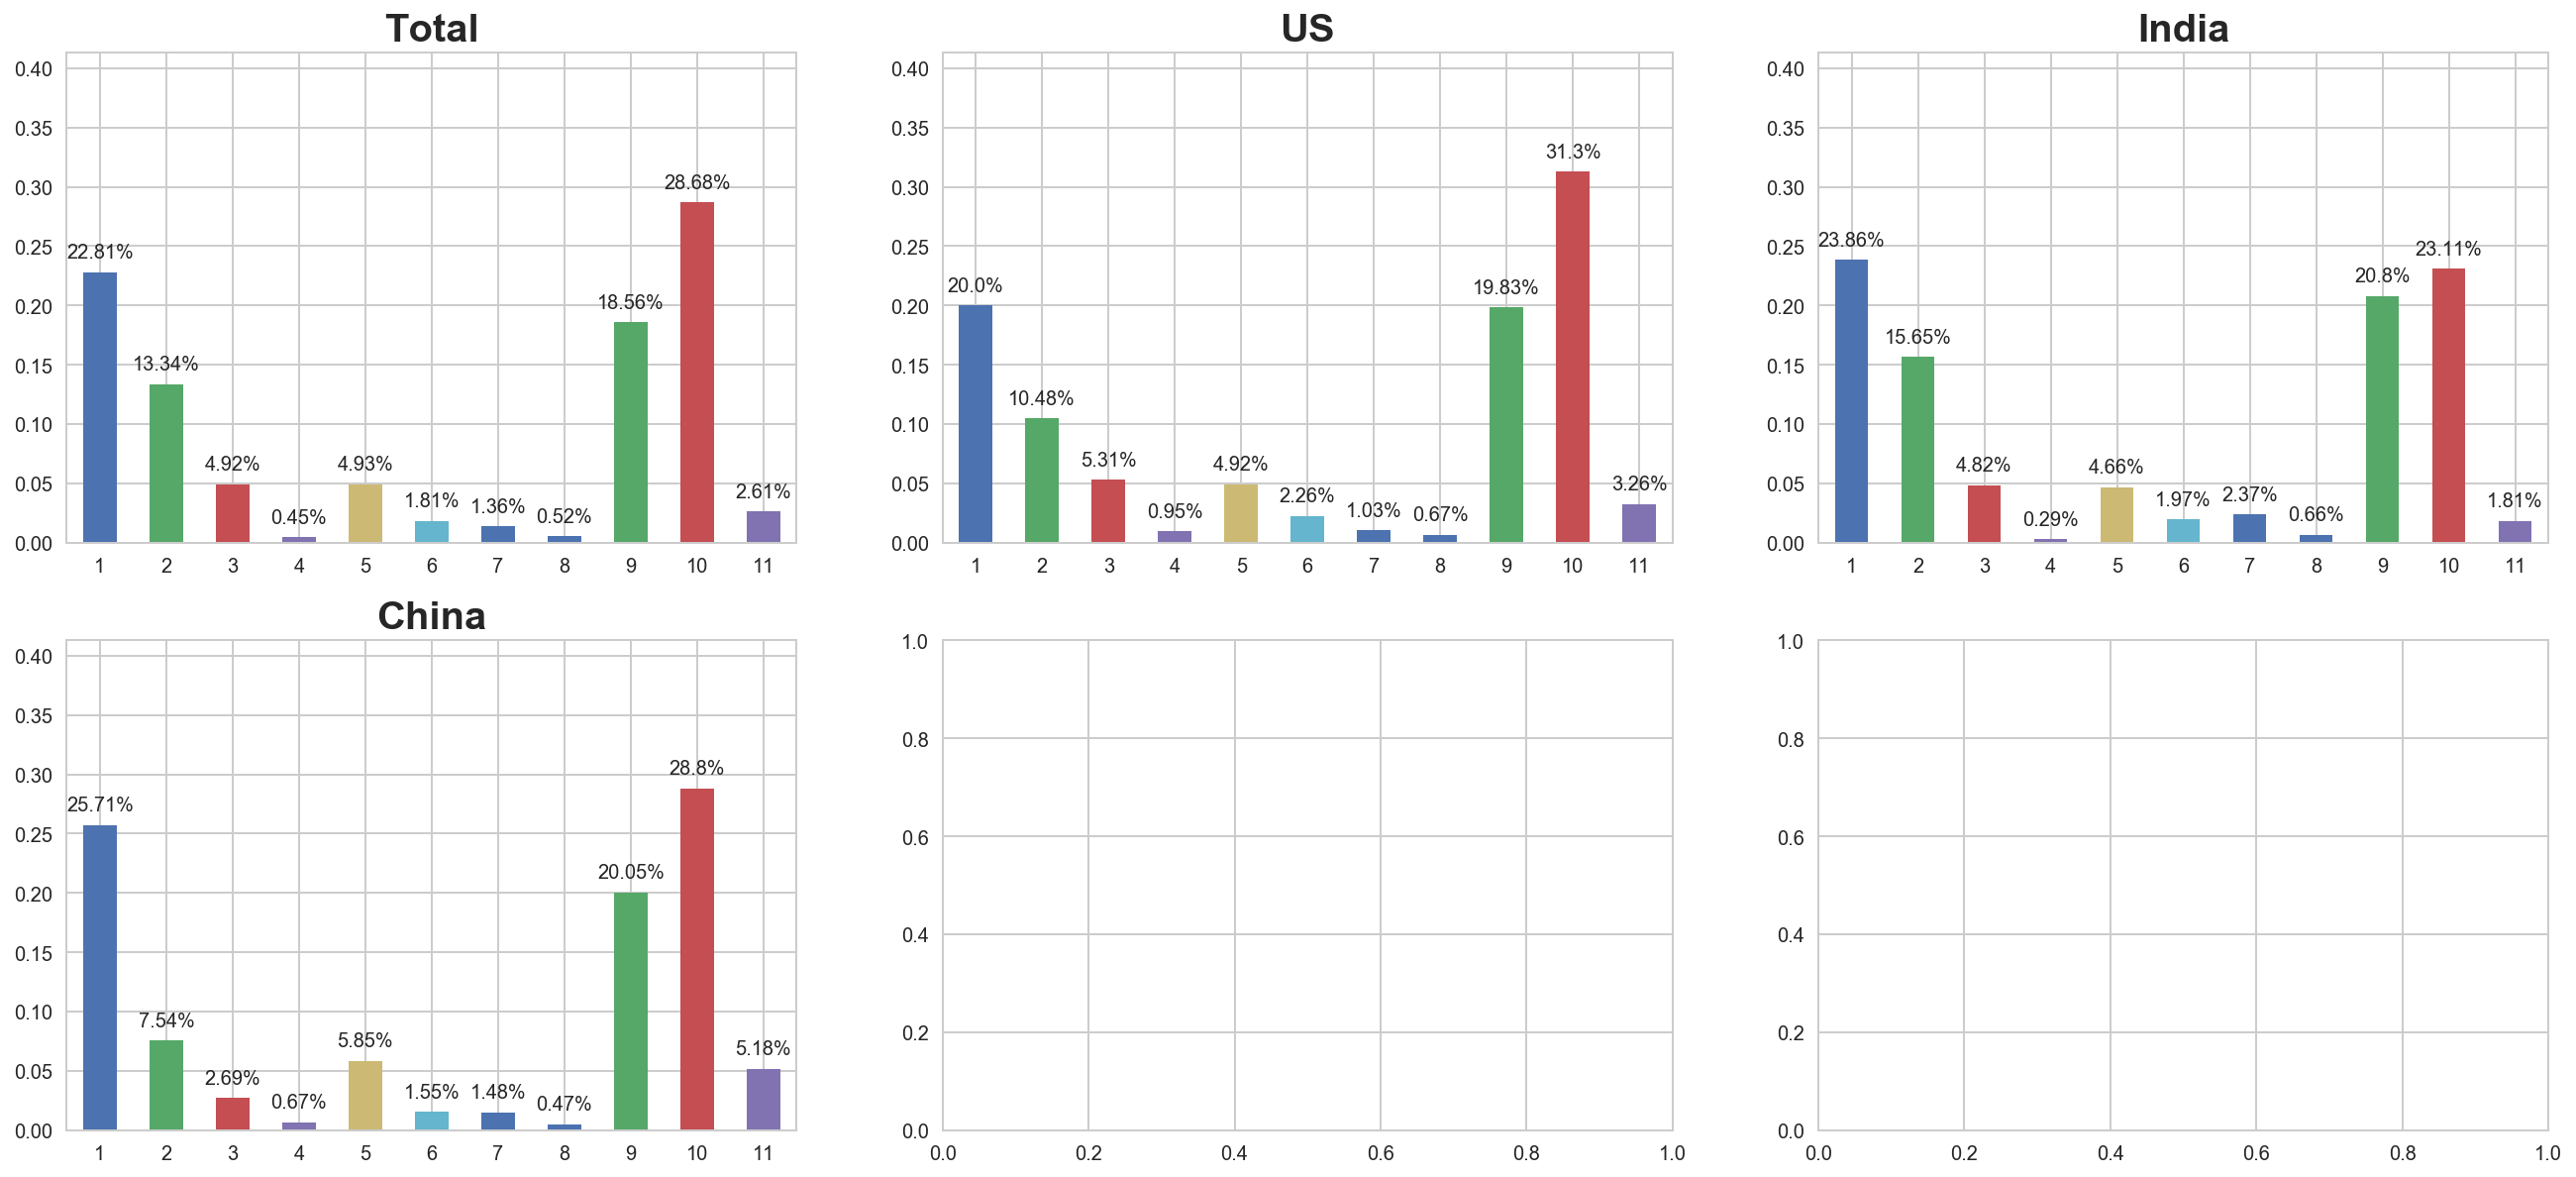

In [5]:
ks.draw_plot(14, dfs_ = dfs, ylim_offset=0.1)

Q34. During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) 
  1.  Gathering data
  2.  Cleaning data
  3.  Visualizing data
  4.  Model building/model selection
  5.  Putting the model into production
  6.  Finding insights in the data and communicating with stakeholders


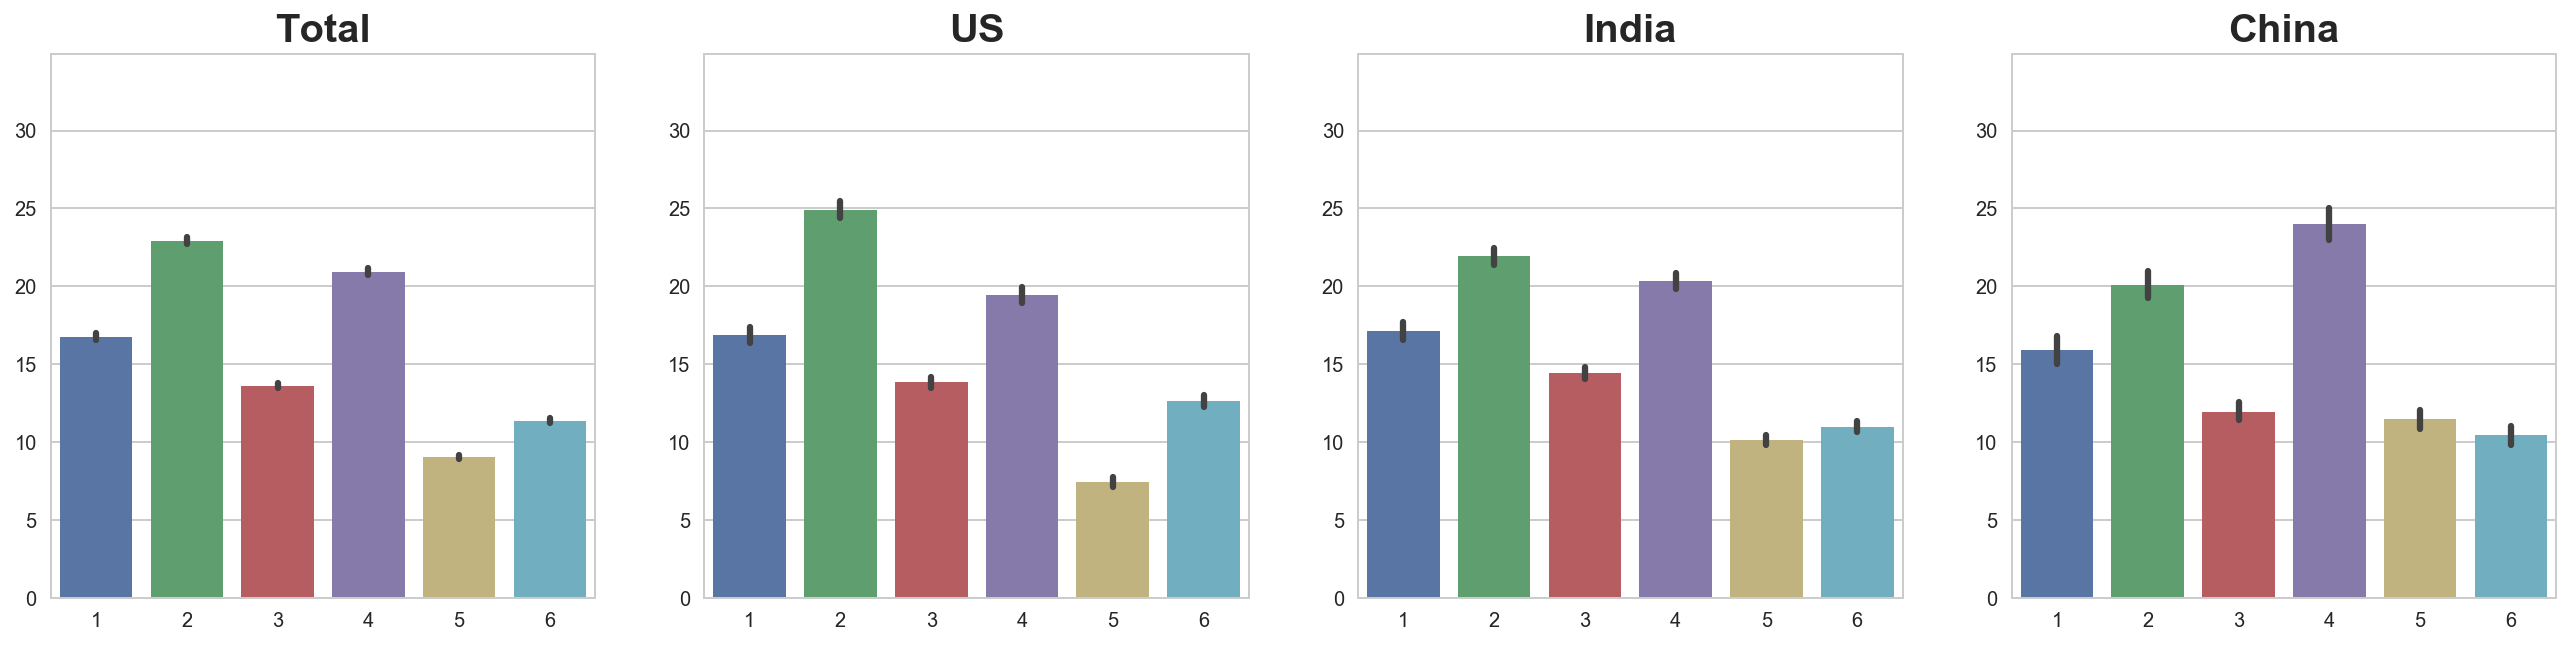

In [6]:
ks.draw_plot(34, dfs_ = dfs, plot_cols=4)

Q35. What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) 
  1.  Self-taught
  2.  Online courses (Coursera, Udemy, edX, etc.)
  3.  Work
  4.  University
  5.  Kaggle competitions
  6.  Other


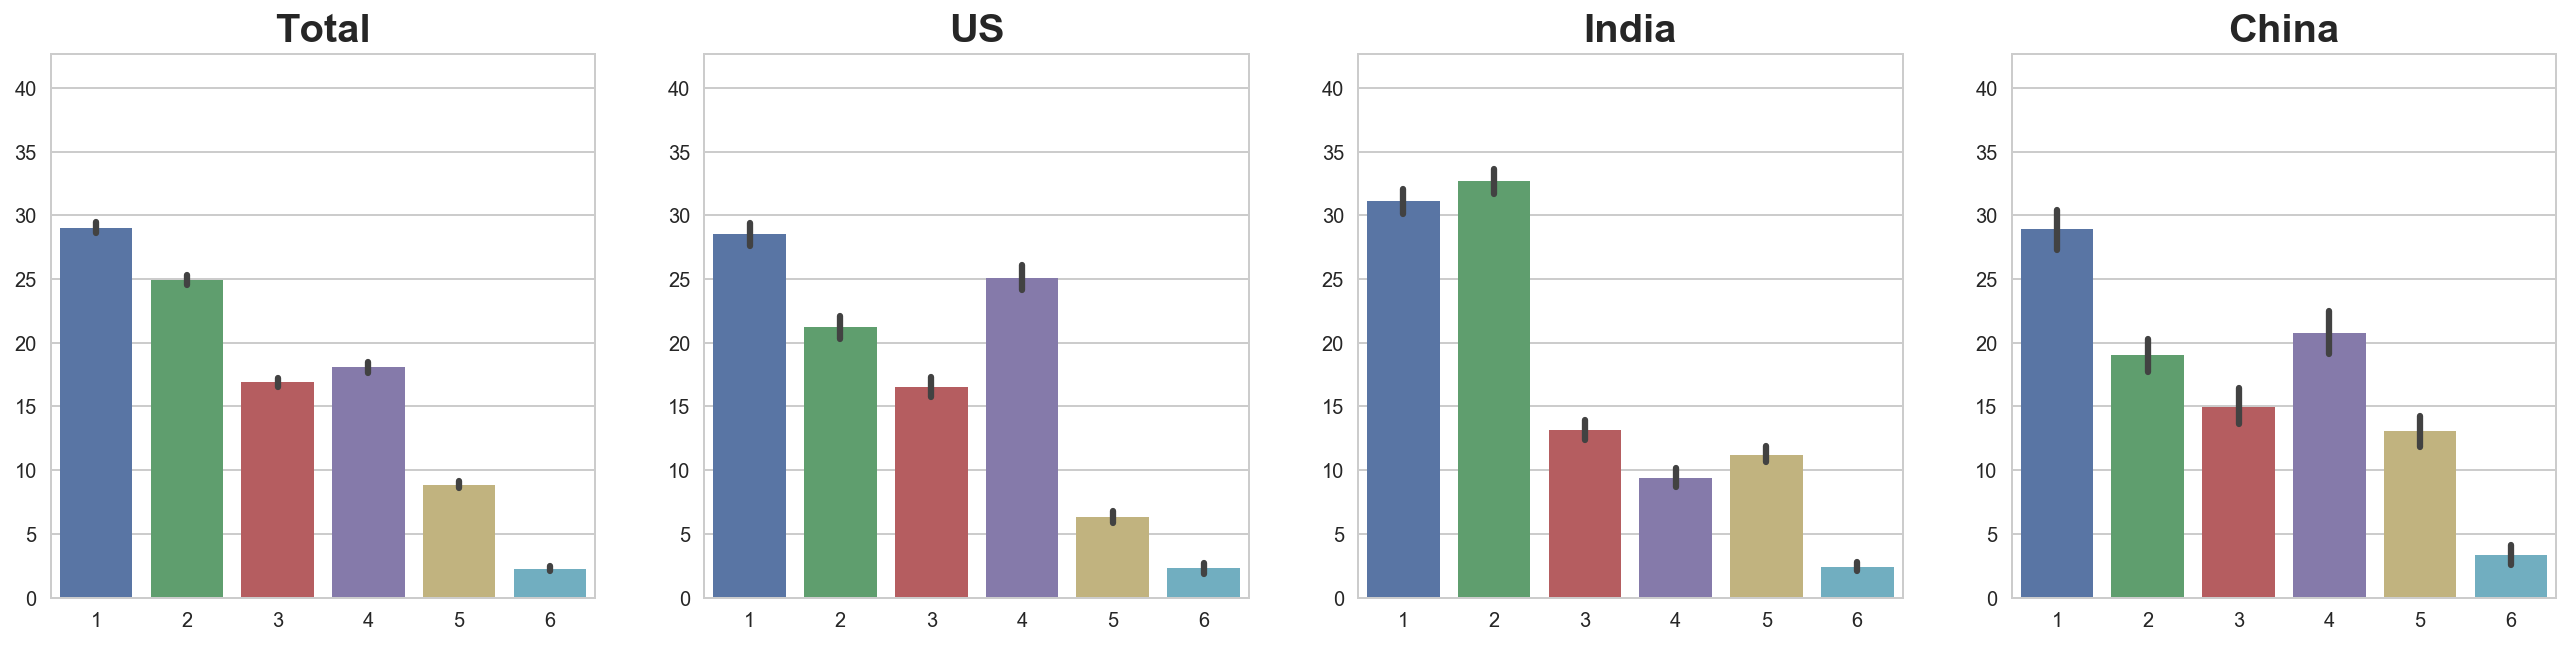

In [6]:
ks.draw_plot(35, dfs_ = dfs, plot_cols=4)

Q11. Select any activities that make up an important part of your role at work: (Select all that apply) 
  1.  Analyze and understand data to influence product or business decisions
  2.  Build and/or run a machine learning service that operationally improves my product or workflows
  3.  Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
  4.  Build prototypes to explore applying machine learning to new areas
  5.  Do research that advances the state of the art of machine learning
  6.  None of these activities are an important part of my role at work
  7.  Other


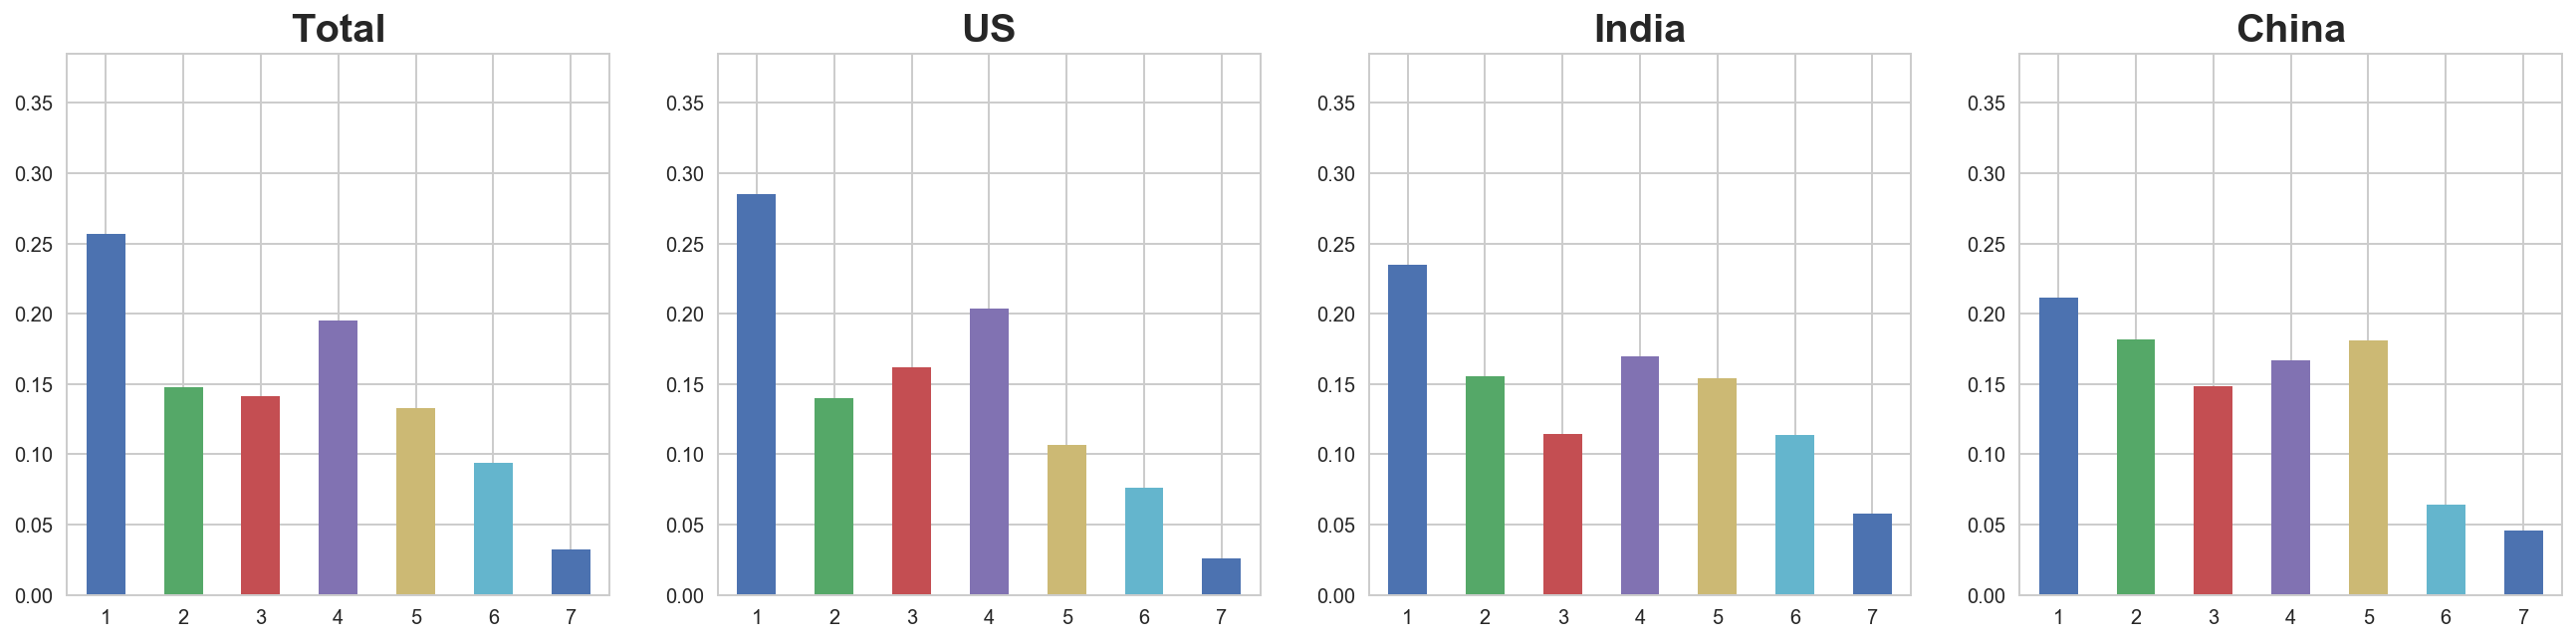

In [5]:
ks.draw_plot(11, dfs_ = dfs, plot_cols=4)

In [10]:
multi_18["Q9"].unique()

array([nan, '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

### 아래는 가장 기본적인 사용법이다. 이것보다는 ks.set_df_I_want_by_country_name(countries = [])을 이용하게되면 훨씬 편할 수 있다

### X 축의 순서가 너무 뒤죽박죽하게 나오는 경우에는 직접 unique list를 만들어서 넣어주는 방법을 택해야한다.

In [6]:
multi_18_US["Q9"].unique().tolist()

[nan,
 '0-10,000',
 '125-150,000',
 '30-40,000',
 '100-125,000',
 '90-100,000',
 '80-90,000',
 '10-20,000',
 '400-500,000',
 'I do not wish to disclose my approximate yearly compensation',
 '50-60,000',
 '70-80,000',
 '150-200,000',
 '60-70,000',
 '40-50,000',
 '200-250,000',
 '20-30,000',
 '250-300,000',
 '300-400,000',
 '500,000+']

In [14]:
order = [
    '0-10,000',
    '10-20,000',
    '20-30,000',
    '30-40,000',
    '40-50,000',
    '50-60,000',
    '60-70,000',
    '70-80,000',
    '80-90,000',
    '90-100,000',
    '100-125,000',
    '125-150,000',
    '150-200,000',
    '200-250,000',
    '250-300,000',
    '300-400,000',
    '400-500,000',
    '500,000+',
    'I do not wish to disclose my approximate yearly compensation'
]

Q9. What is your current yearly compensation (approximate $USD)?
왼쪽에서부터 지문 내용 : 
1 0-10,000
2 10-20,000
3 20-30,000
4 30-40,000
5 40-50,000
6 50-60,000
7 60-70,000
8 70-80,000
9 80-90,000
10 90-100,000
11 100-125,000
12 125-150,000
13 150-200,000
14 200-250,000
15 250-300,000
16 300-400,000
17 400-500,000
18 500,000+
19 I do not wish to disclose my approximate yearly compensation


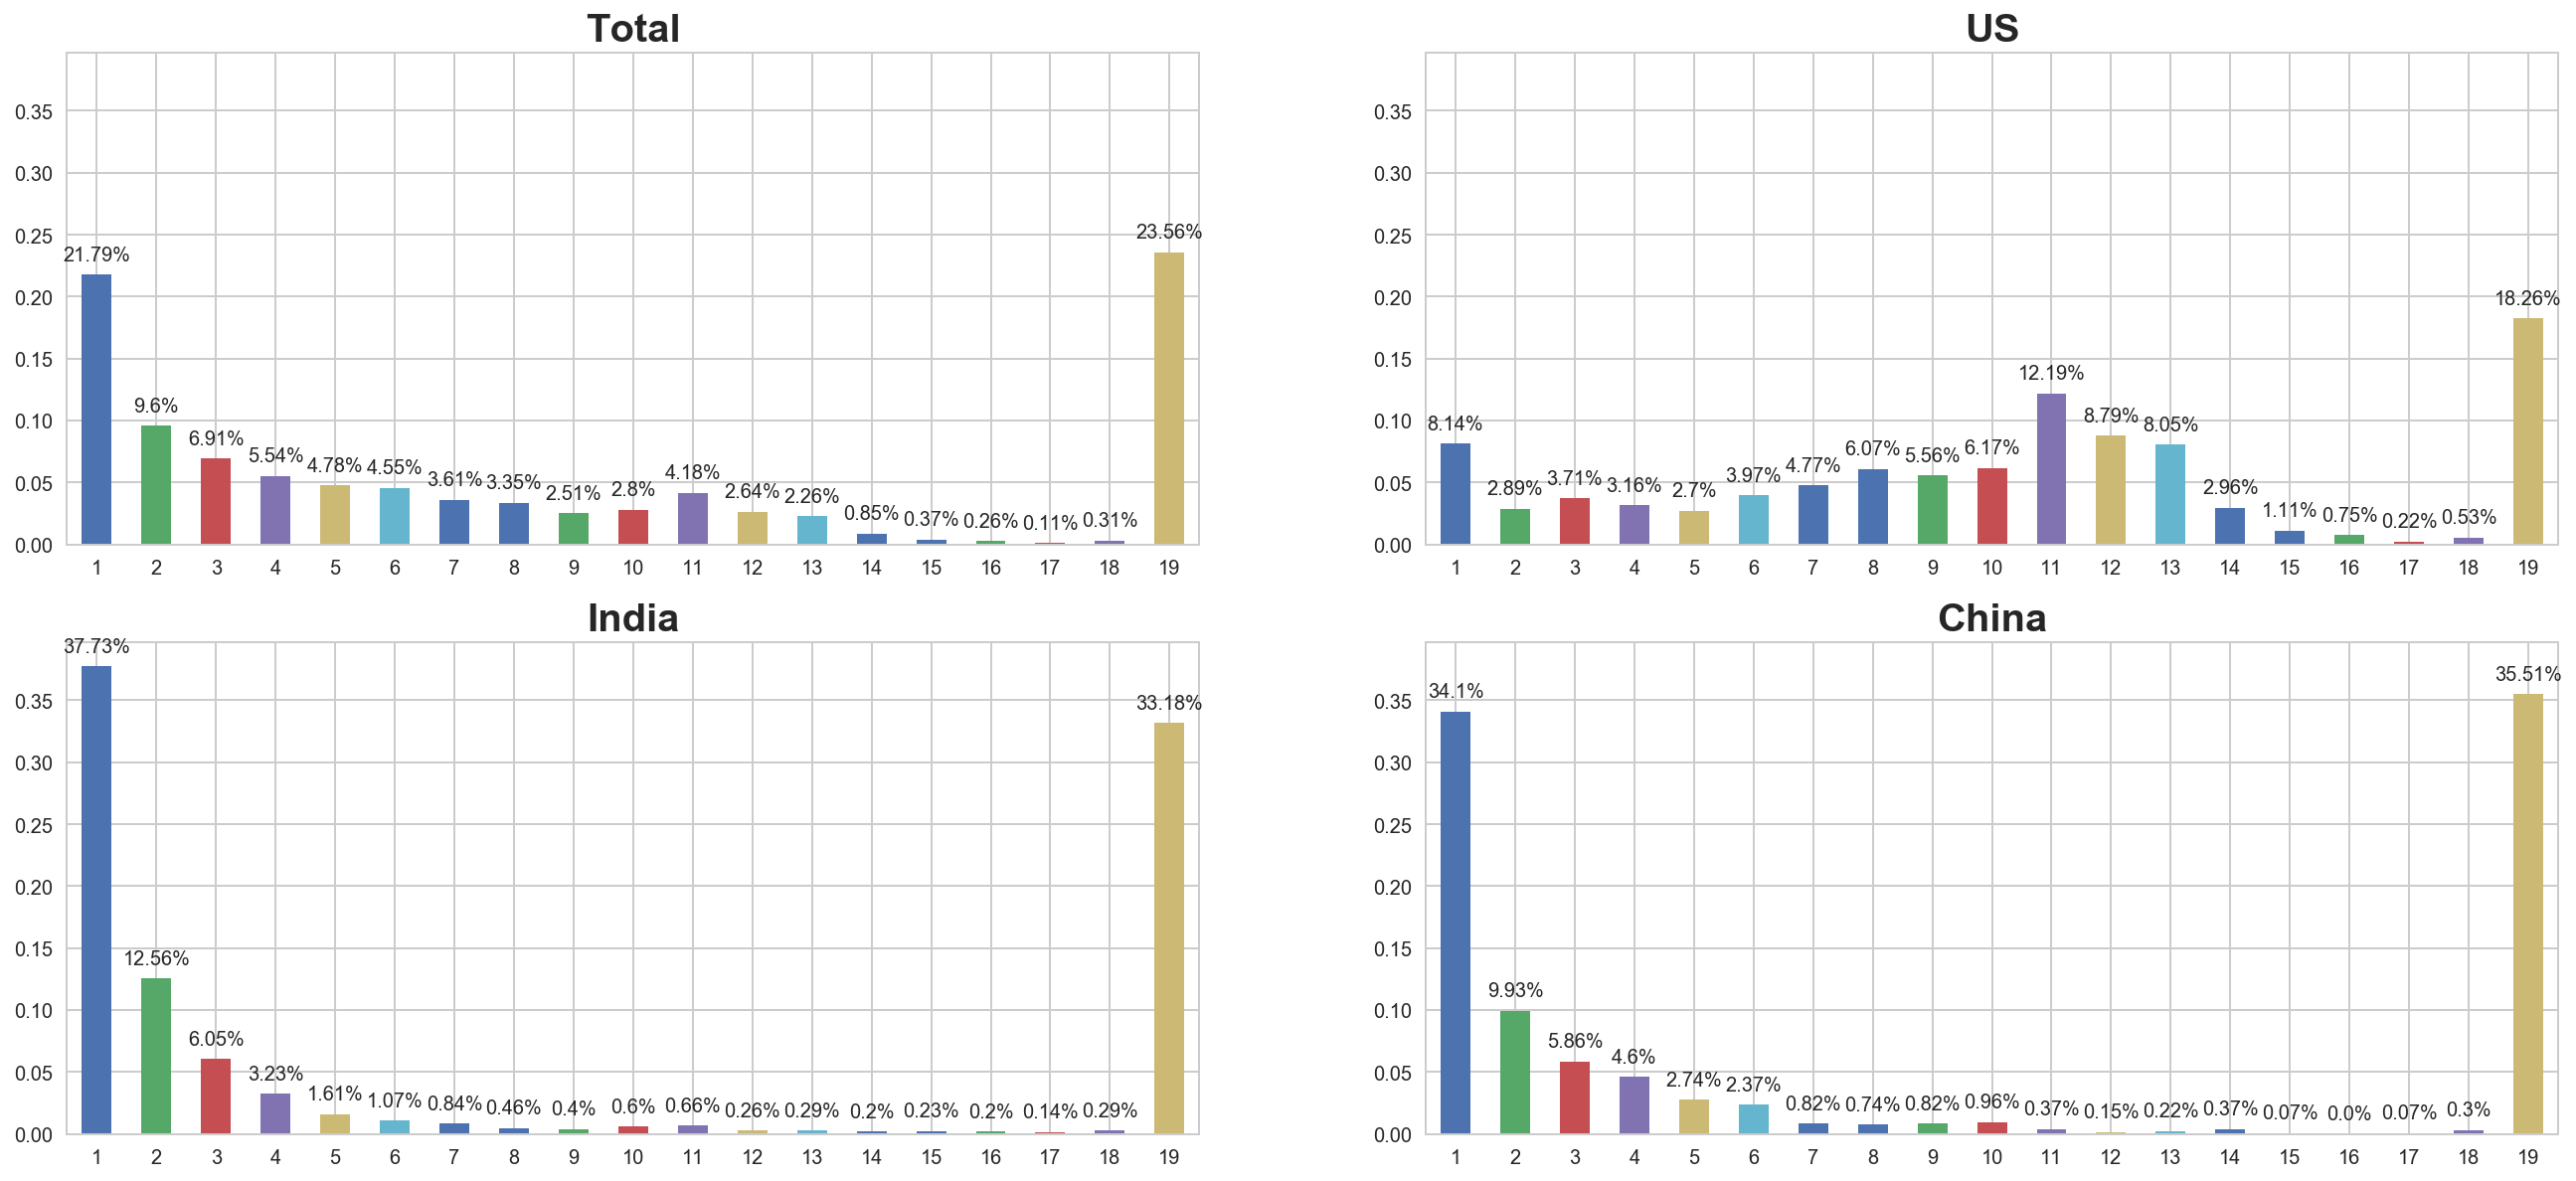

In [15]:
ks.draw_plot(9, dfs_ = dfs, order=order, is_use_the_same_y_lim=True, plot_cols=2)

Q18. What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
왼쪽에서부터 지문 내용 : 
1 Python
2 SQL
3 R
4 Other
5 Scala
6 None
7 Java
8 MATLAB
9 C++
10 SAS
11 Javascript
12 Go
13 VBA


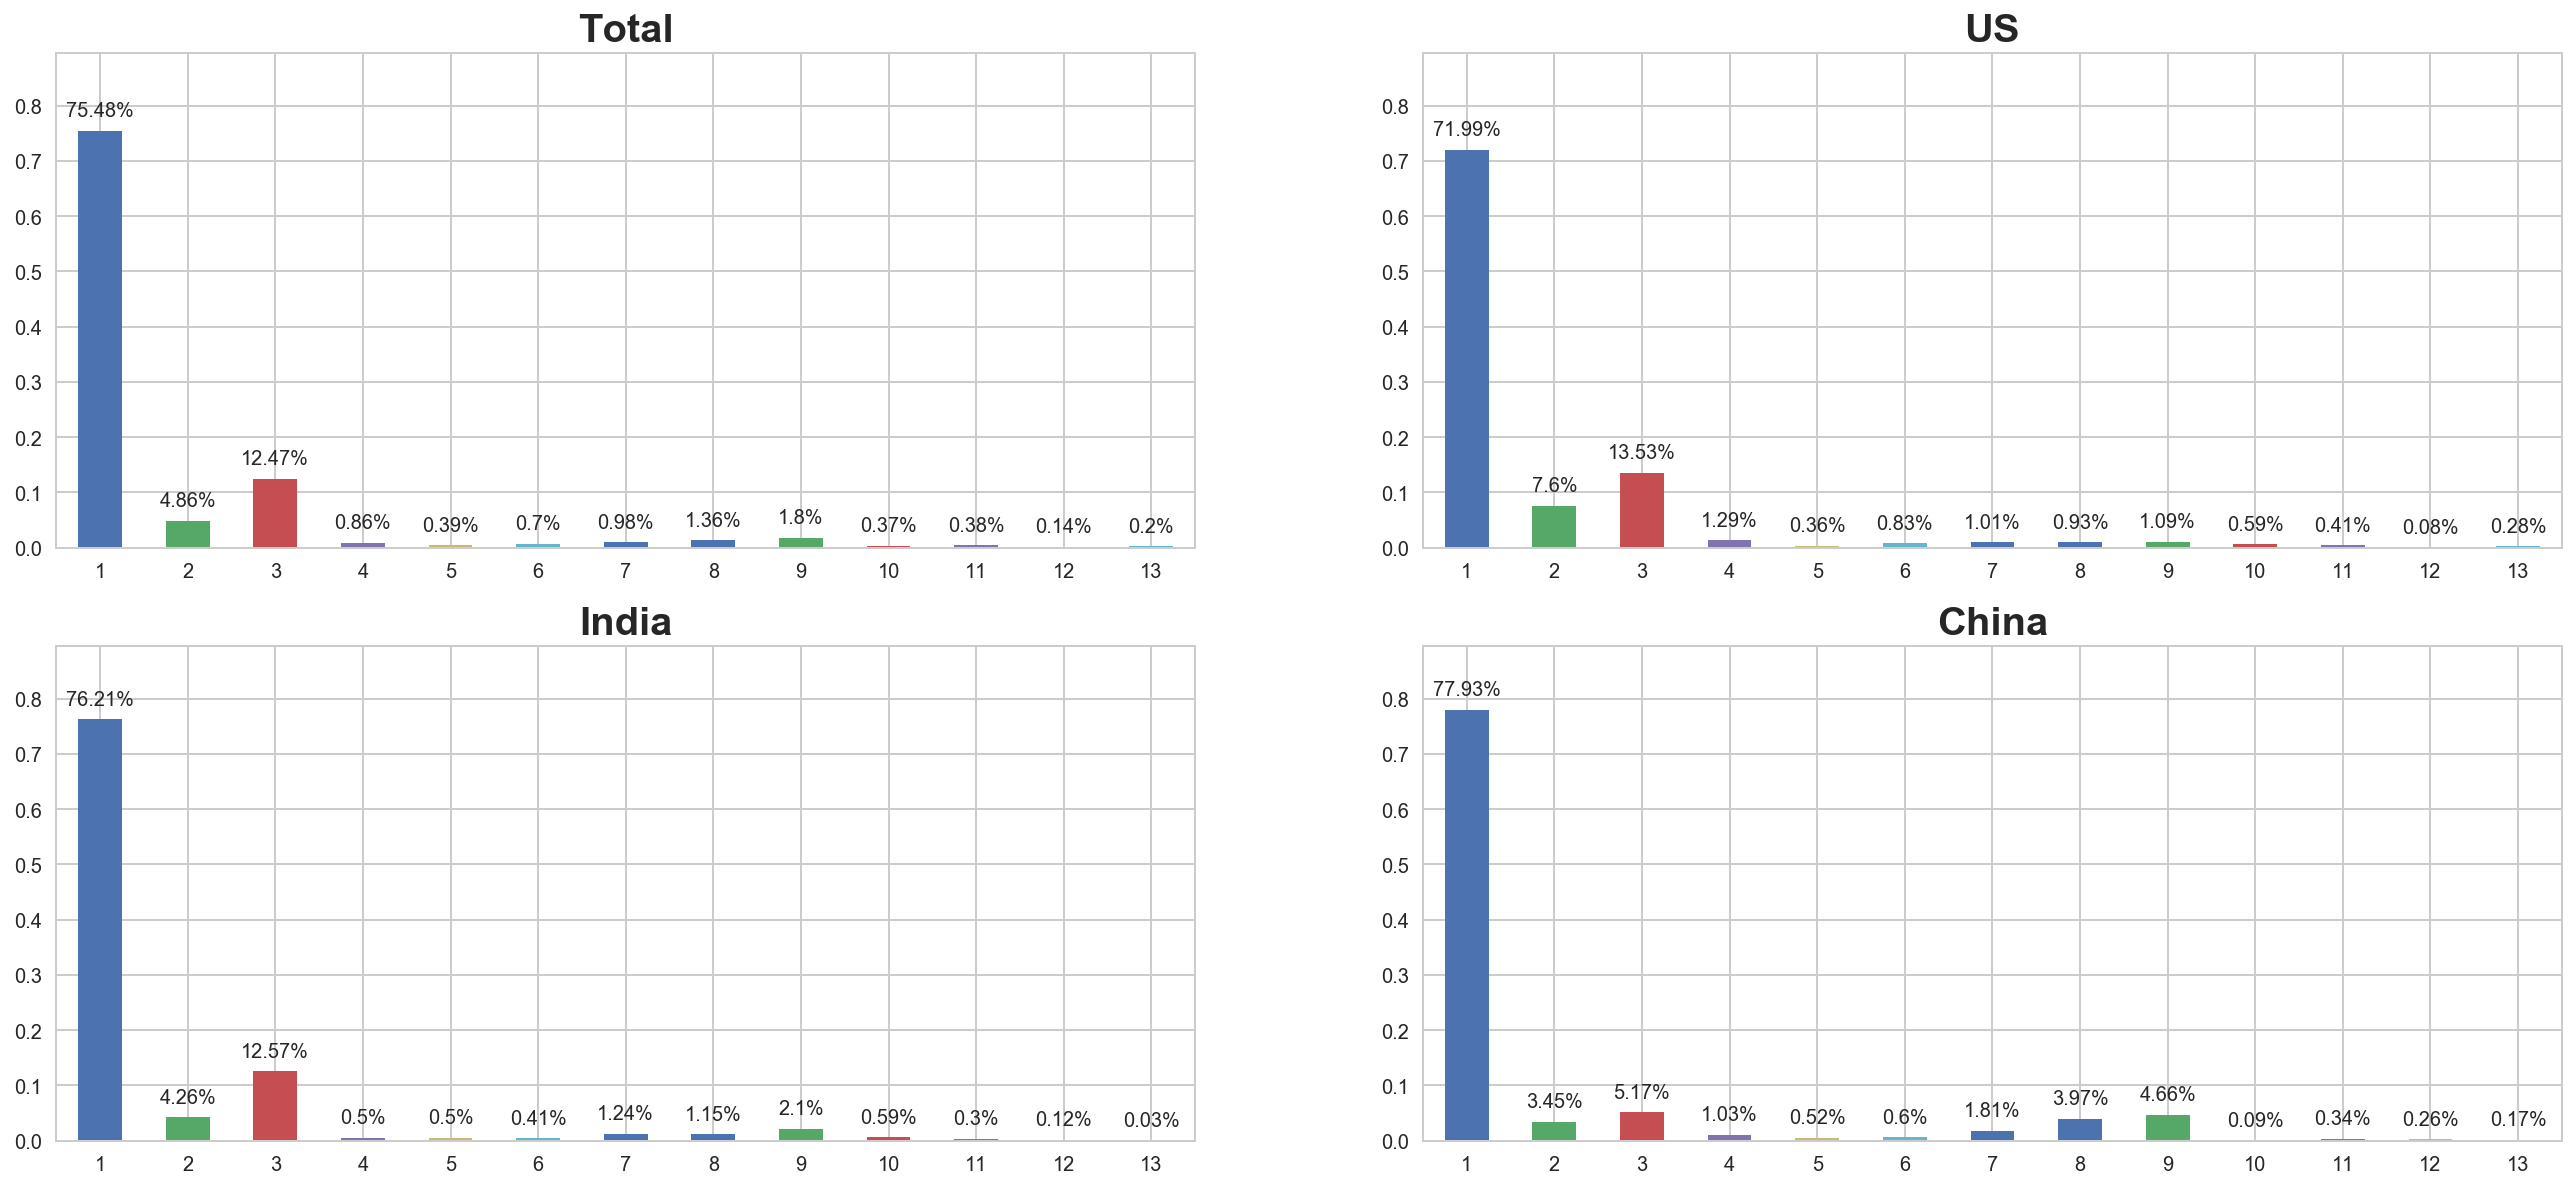

In [17]:
ks.draw_plot(18, dfs_ = dfs, plot_cols=2, ylim_offset=0.3)

Q28. Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) 
  1.  Amazon Transcribe
  2. text API
  3.  Amazon Rekognition
  4.  Google Cloud Vision API
  5.  Amazon Comprehend
  6.  Google Cloud Natural Language API
  7.  Amazon Translate
  8.  Google Cloud Translation API
  9.  Amazon Lex
  10.  Google Dialogflow Enterprise Edition
  11.  Amazon Rekognition Video
  12.  Google Cloud Video Intelligence API
  13.  Google Cloud AutoML
  14.  Amazon SageMaker
  15.  Google Cloud Machine Learning Engine
  16.  DataRobot
  17.  H20 Driverless AI
  18.  Domino Datalab
  19.  SAS
  20.  Dataiku
  21.  RapidMiner
  22.  Instabase
  23.  Algorithmia
  24.  Dataversity
  25.  Cloudera
  26.  Azure Machine Learning Studio
  27.  Azure Machine Learning Workbench
  28.  Azure Cortana Intelligence Suite
  29.  Azure Bing Speech API
  30.  Azure Speaker Recognition API
  31.  Azure Computer Vision API
  32.  Azure Face API
  33.

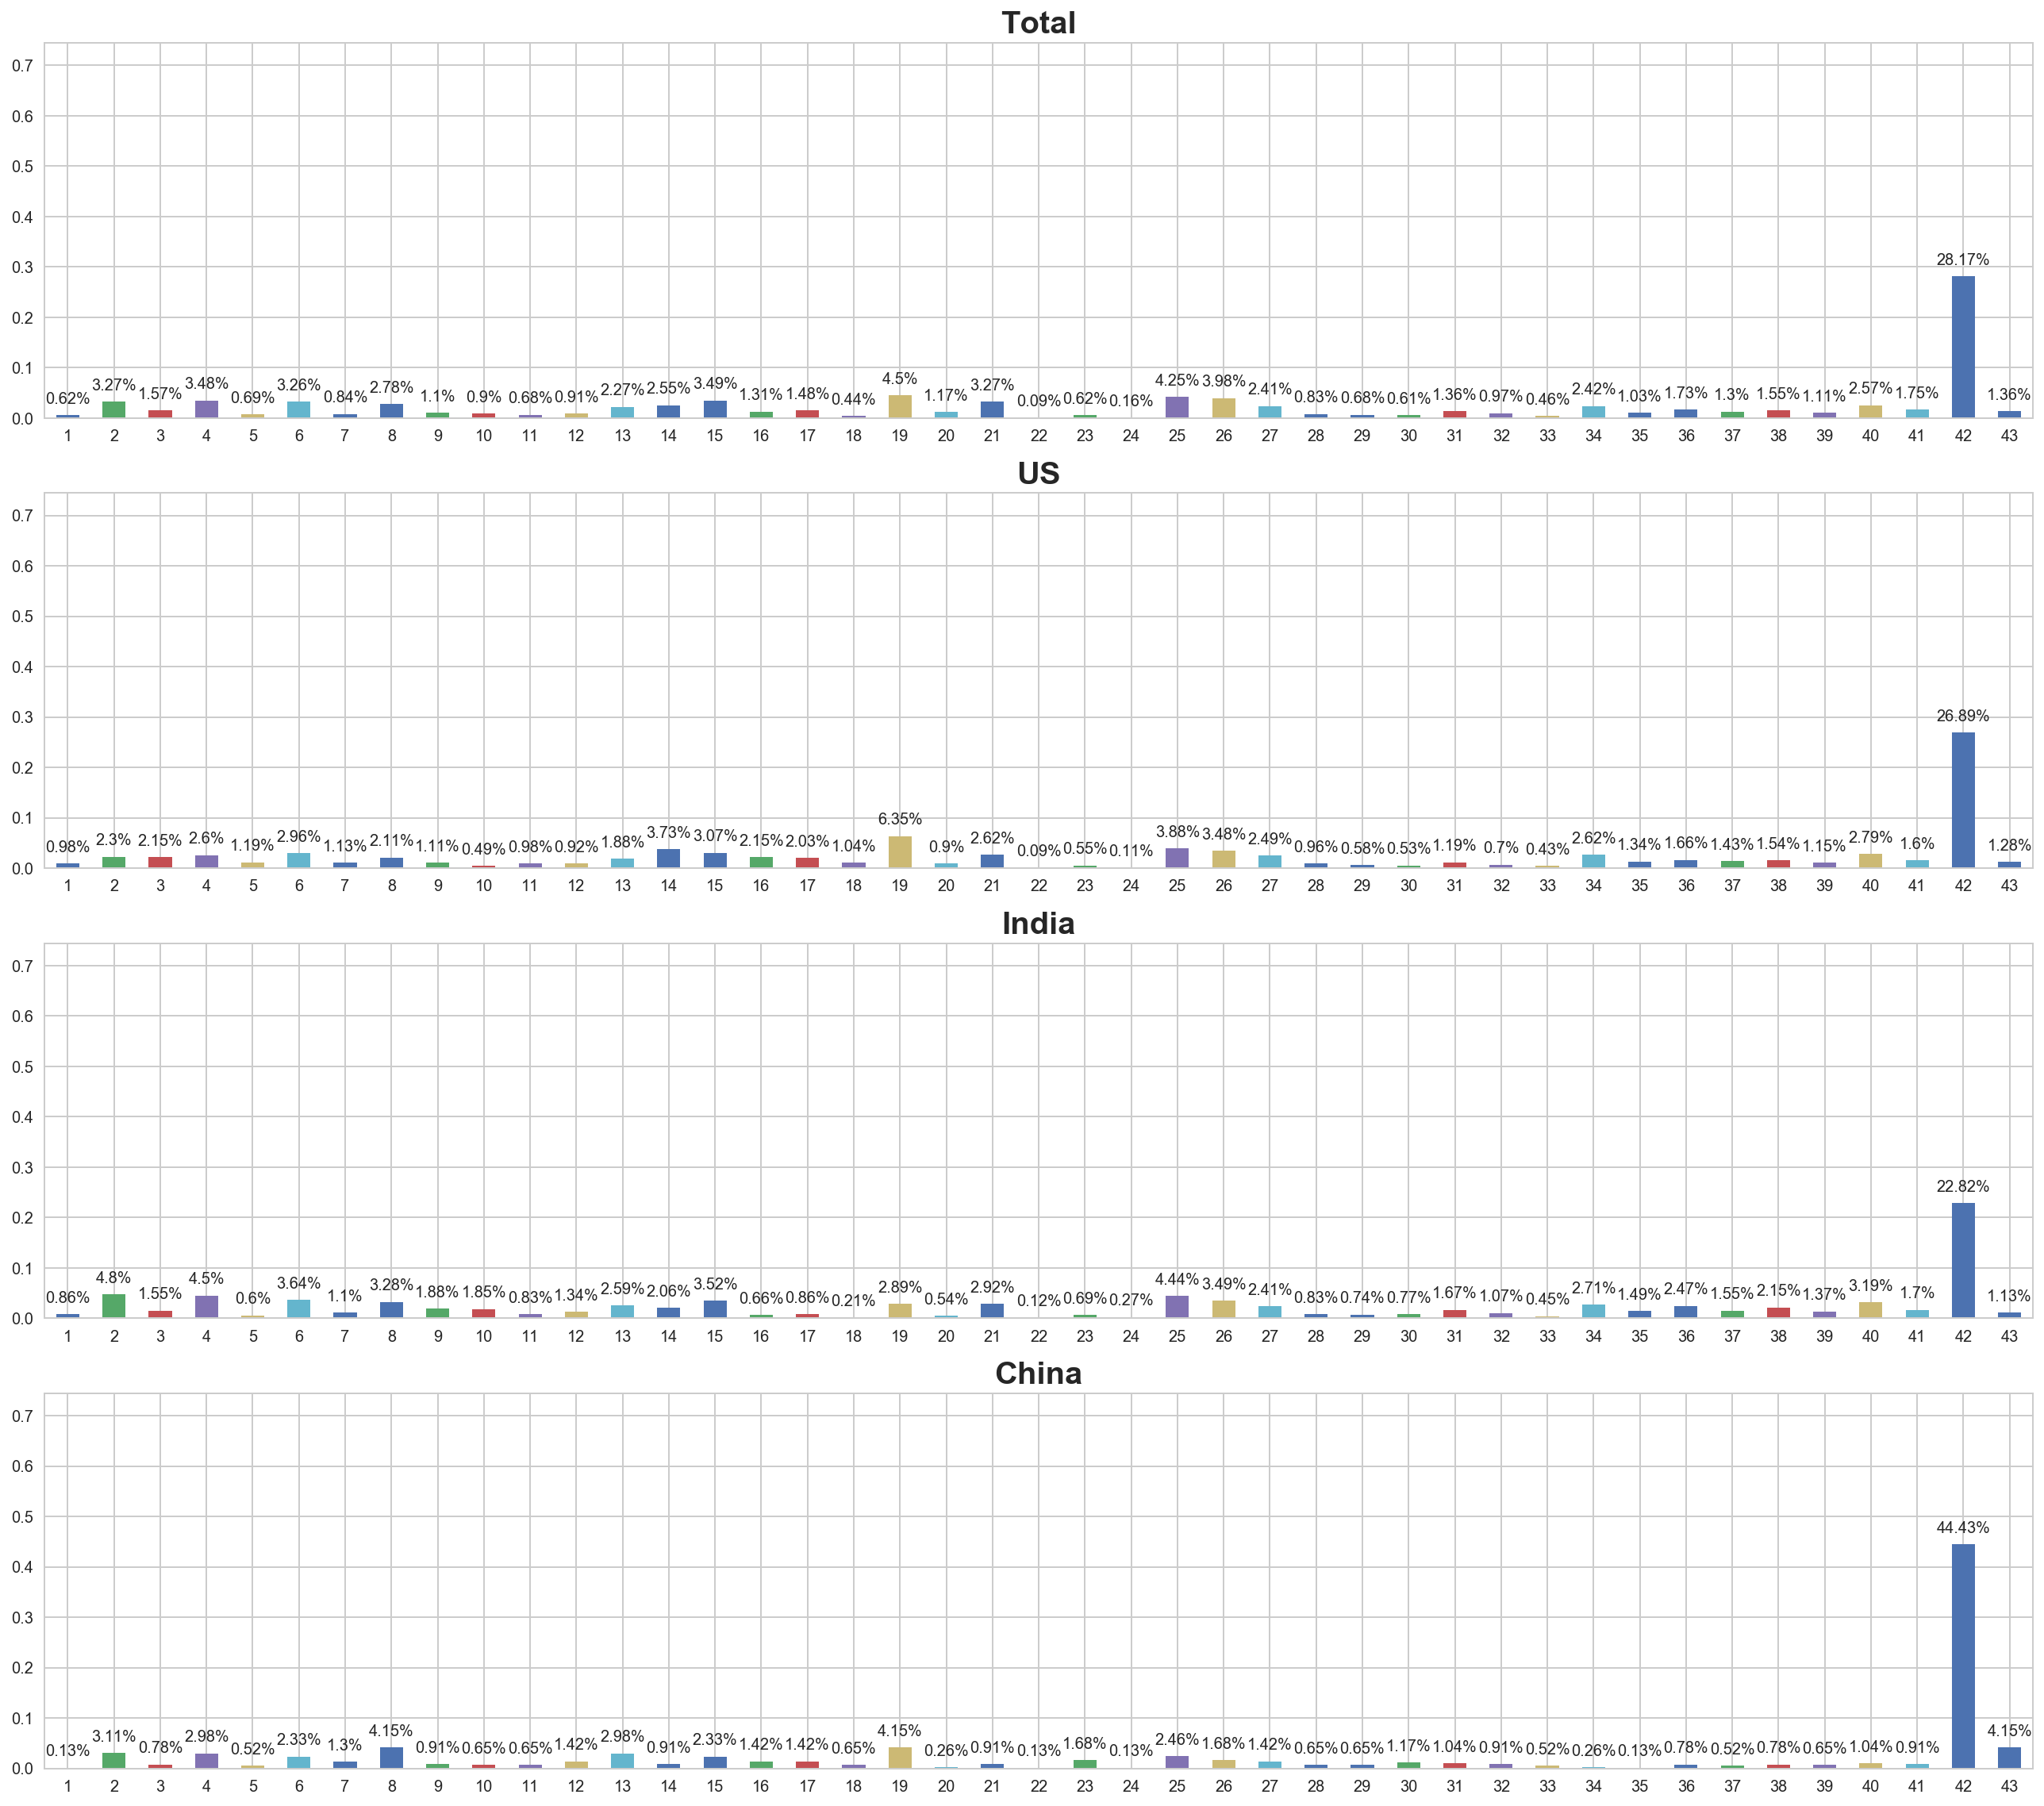

In [6]:
ks.draw_plot(28, dfs_ = dfs, plot_cols=1, ylim_offset= 0.3)

Q2. What is your age (# years)?


##### Plot row가 2개 이상이므로 Xlabel은 지문 내용을 참고하세요.

왼쪽에서부터 지문 내용 : 
1 25-29
2 40-44
3 60-69
4 22-24
5 30-34
6 35-39
7 18-21
8 55-59
9 45-49
10 50-54


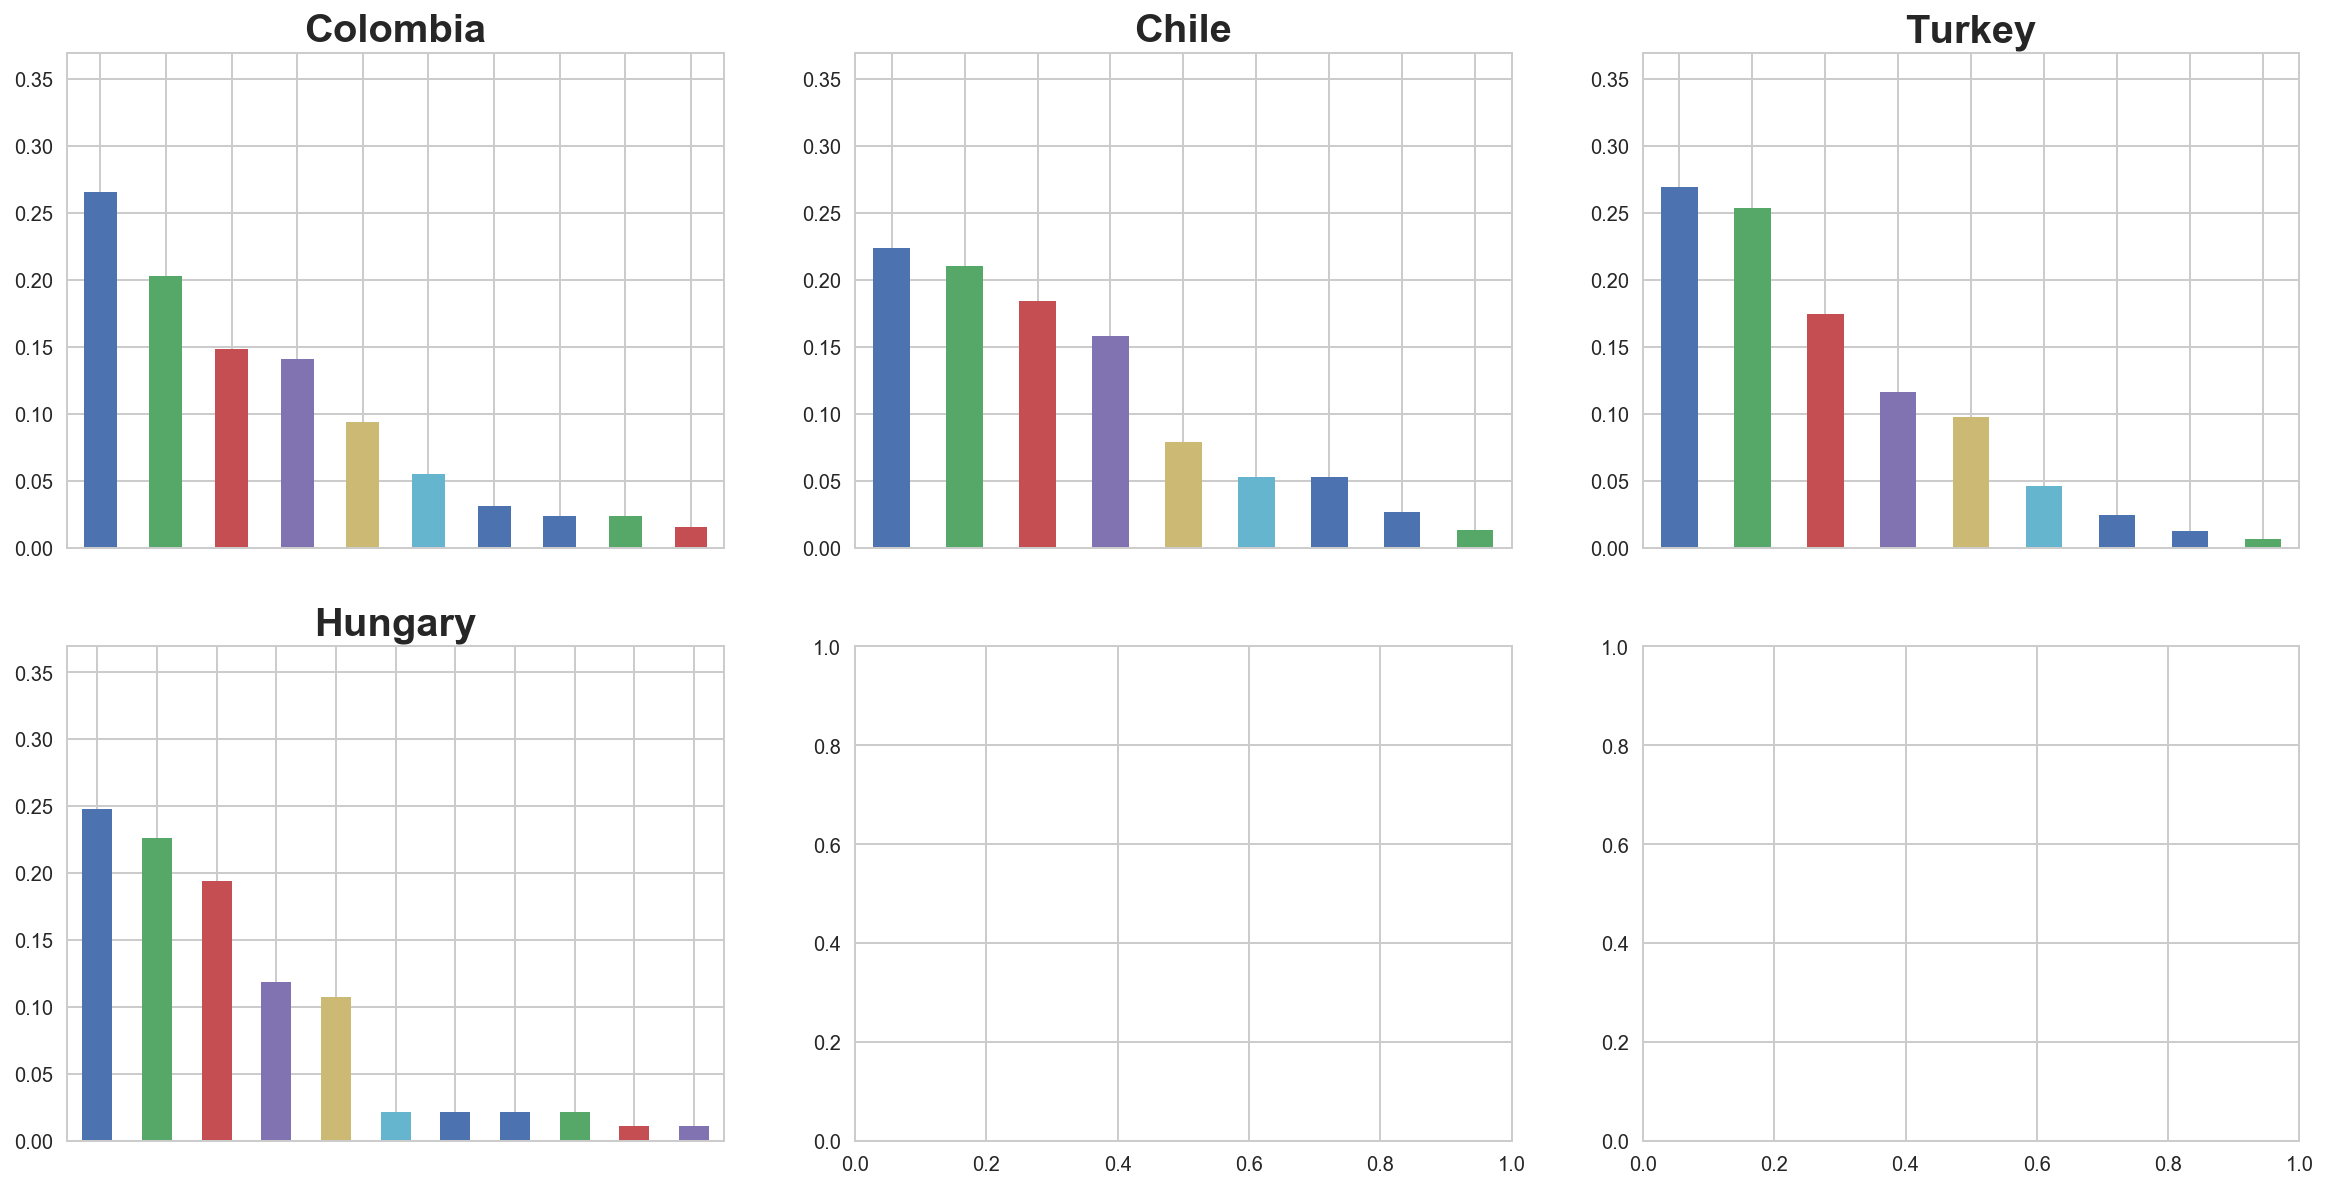

In [24]:
ks.draw_plot(2)

Q9. What is your current yearly compensation (approximate $USD)?
왼쪽에서부터 지문 내용 : 
1 0-10,000
2 10-20,000
3 20-30,000
4 30-40,000
5 40-50,000
6 50-60,000
7 60-70,000
8 70-80,000
9 80-90,000
10 90-100,000
11 100-125,000
12 125-150,000
13 150-200,000
14 200-250,000
15 250-300,000
16 300-400,000
17 400-500,000
18 500,000+I do not wish to disclose my approximate yearly compensation


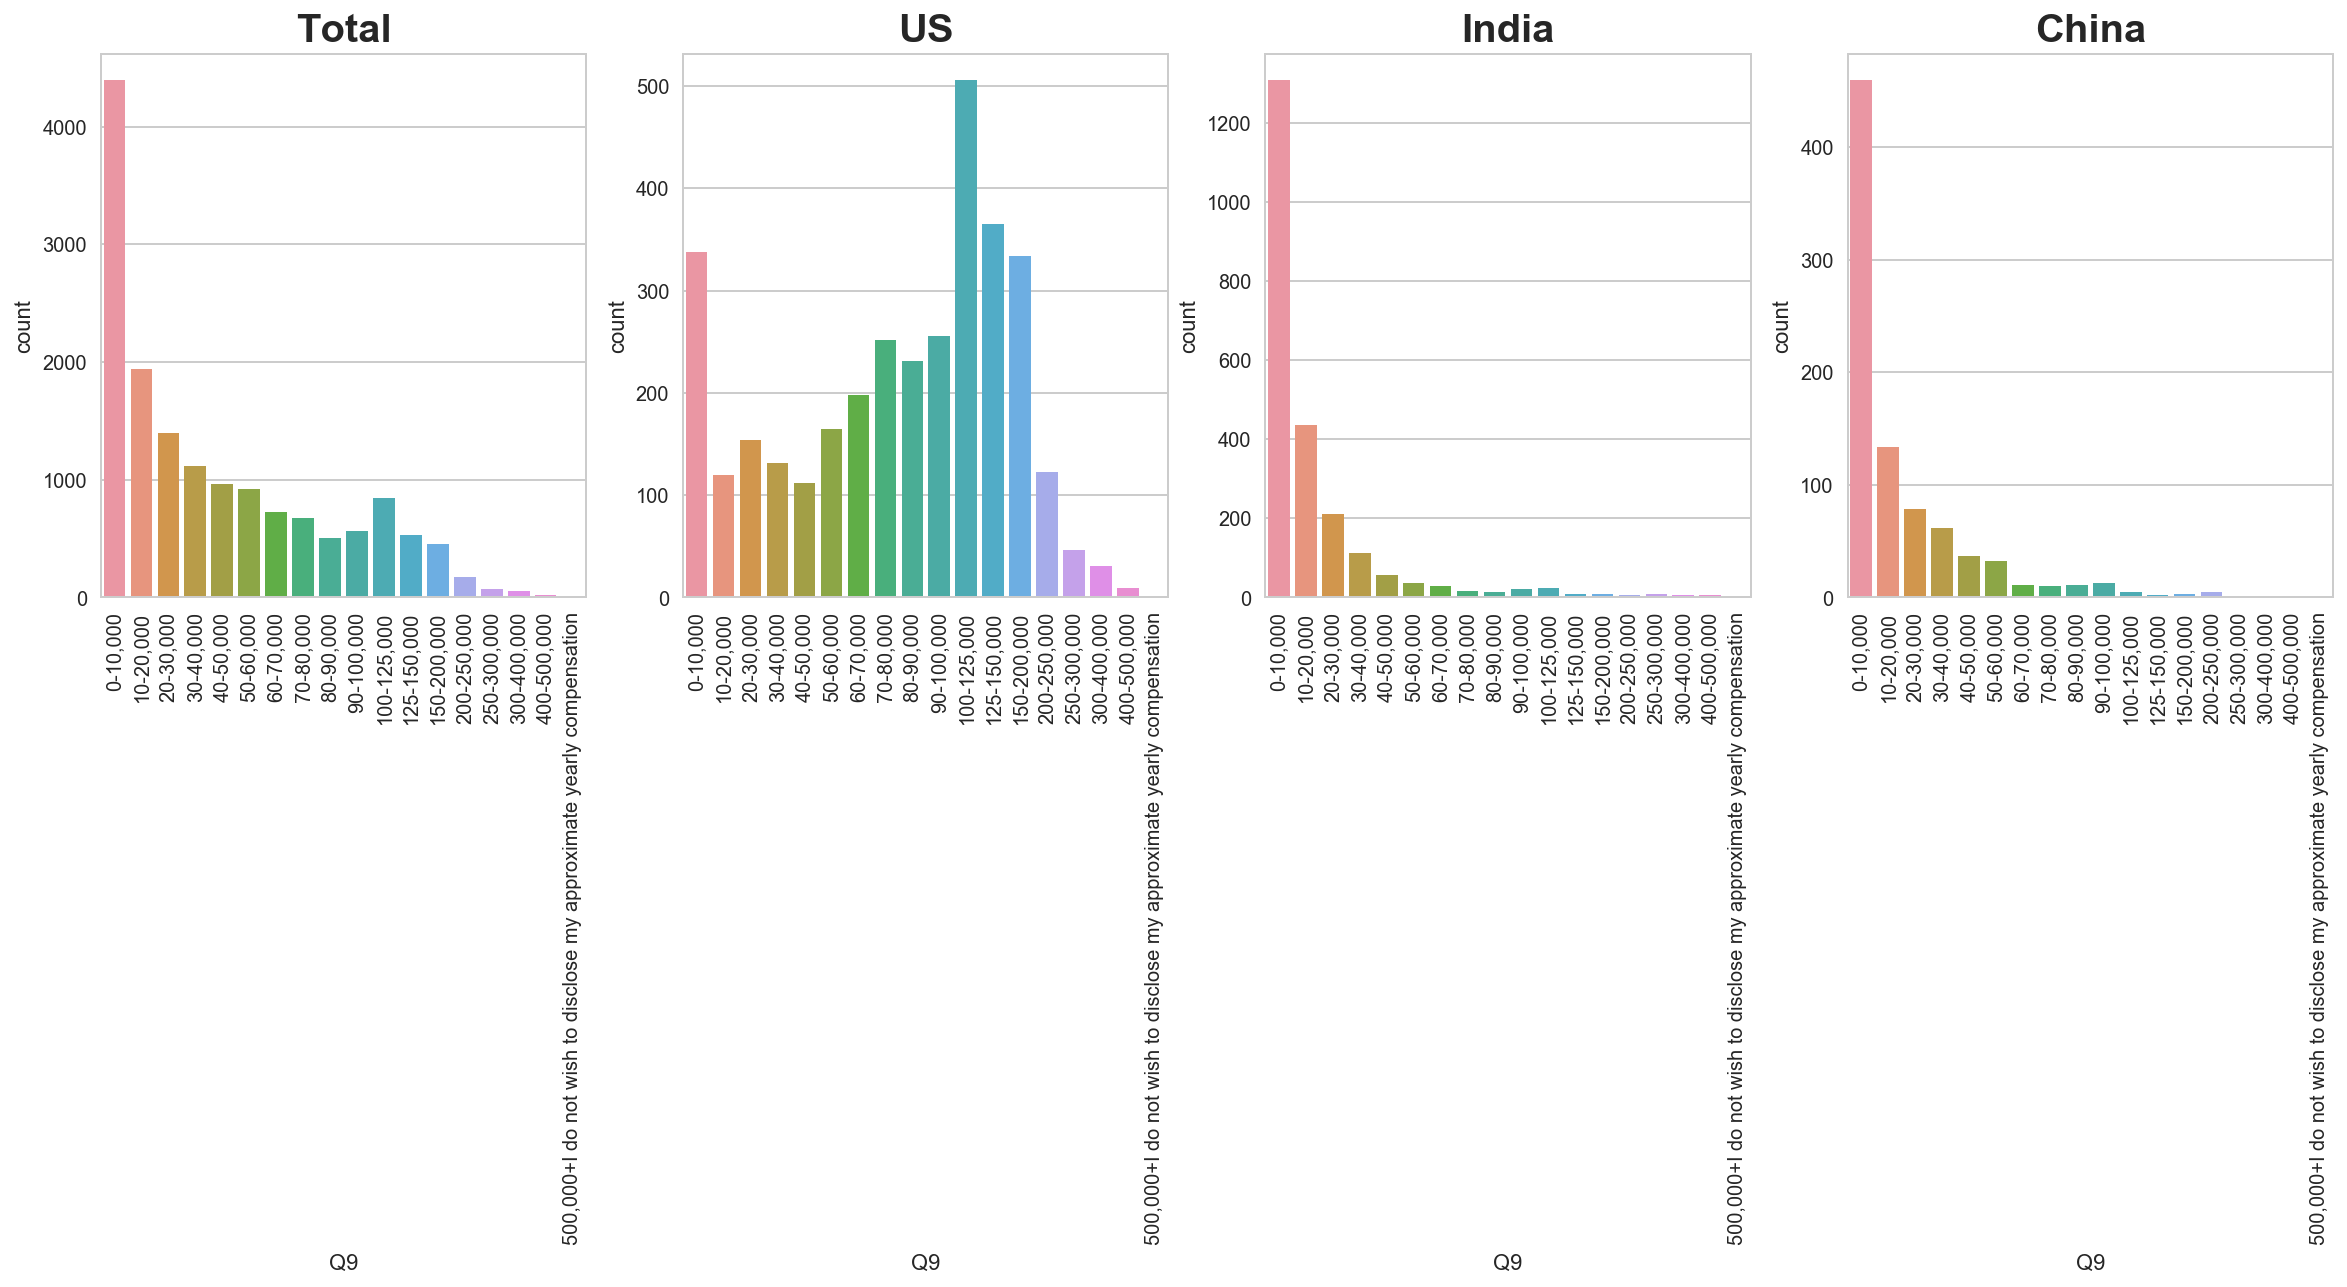

In [12]:
ks.draw_plot(9, dfs_ = dfs, plot_cols=4, order = order)

### 아래는 객체 내부에 우리가 지정한 국가들을 저장하여 간편하게 사용하는 함수이다! 사용법을 숙지하여 편하게 활용하자!

In [13]:
ks.set_df_I_want_by_country_name(["s"])

틀린 국가명입니다. 아래 국가명 중에서만 선택하세요.
['United States of America', 'Indonesia', 'India', 'Colombia', 'Chile', 'Turkey', 'Hungary', 'Ireland', 'France', 'Argentina', 'Japan', 'Nigeria', 'Spain', 'Other', 'Iran, Islamic Republic of...', 'United Kingdom of Great Britain and Northern Ireland', 'Poland', 'Kenya', 'Denmark', 'Netherlands', 'China', 'Sweden', 'Ukraine', 'Canada', 'Australia', 'Russia', 'Austria', 'Italy', 'Mexico', 'Germany', 'I do not wish to disclose my location', 'Singapore', 'Brazil', 'Switzerland', 'South Africa', 'South Korea', 'Malaysia', 'Hong Kong (S.A.R.)', 'Egypt', 'Tunisia', 'Portugal', 'Thailand', 'Morocco', 'Pakistan', 'Czech Republic', 'Romania', 'Israel', 'Philippines', 'Bangladesh', 'Belarus', 'Viet Nam', 'Belgium', 'New Zealand', 'Norway', 'Finland', 'Greece', 'Peru', 'Republic of Korea']


In [3]:
ks.set_df_I_want_by_country_name(['Colombia', 'Chile', 'Turkey', 'Hungary'])

Q10. Does your current employer incorporate machine learning methods into their business?
왼쪽에서부터 지문 내용 : 
1 We are exploring ML methods (and may one day put a model into production)
2 I do not know
3 We use ML methods for generating insights (but do not put working models into production)
4 No (we do not use ML methods)
5 We recently started using ML methods (i.e., models in production for less than 2 years)
6 We have well established ML methods (i.e., models in production for more than 2 years)


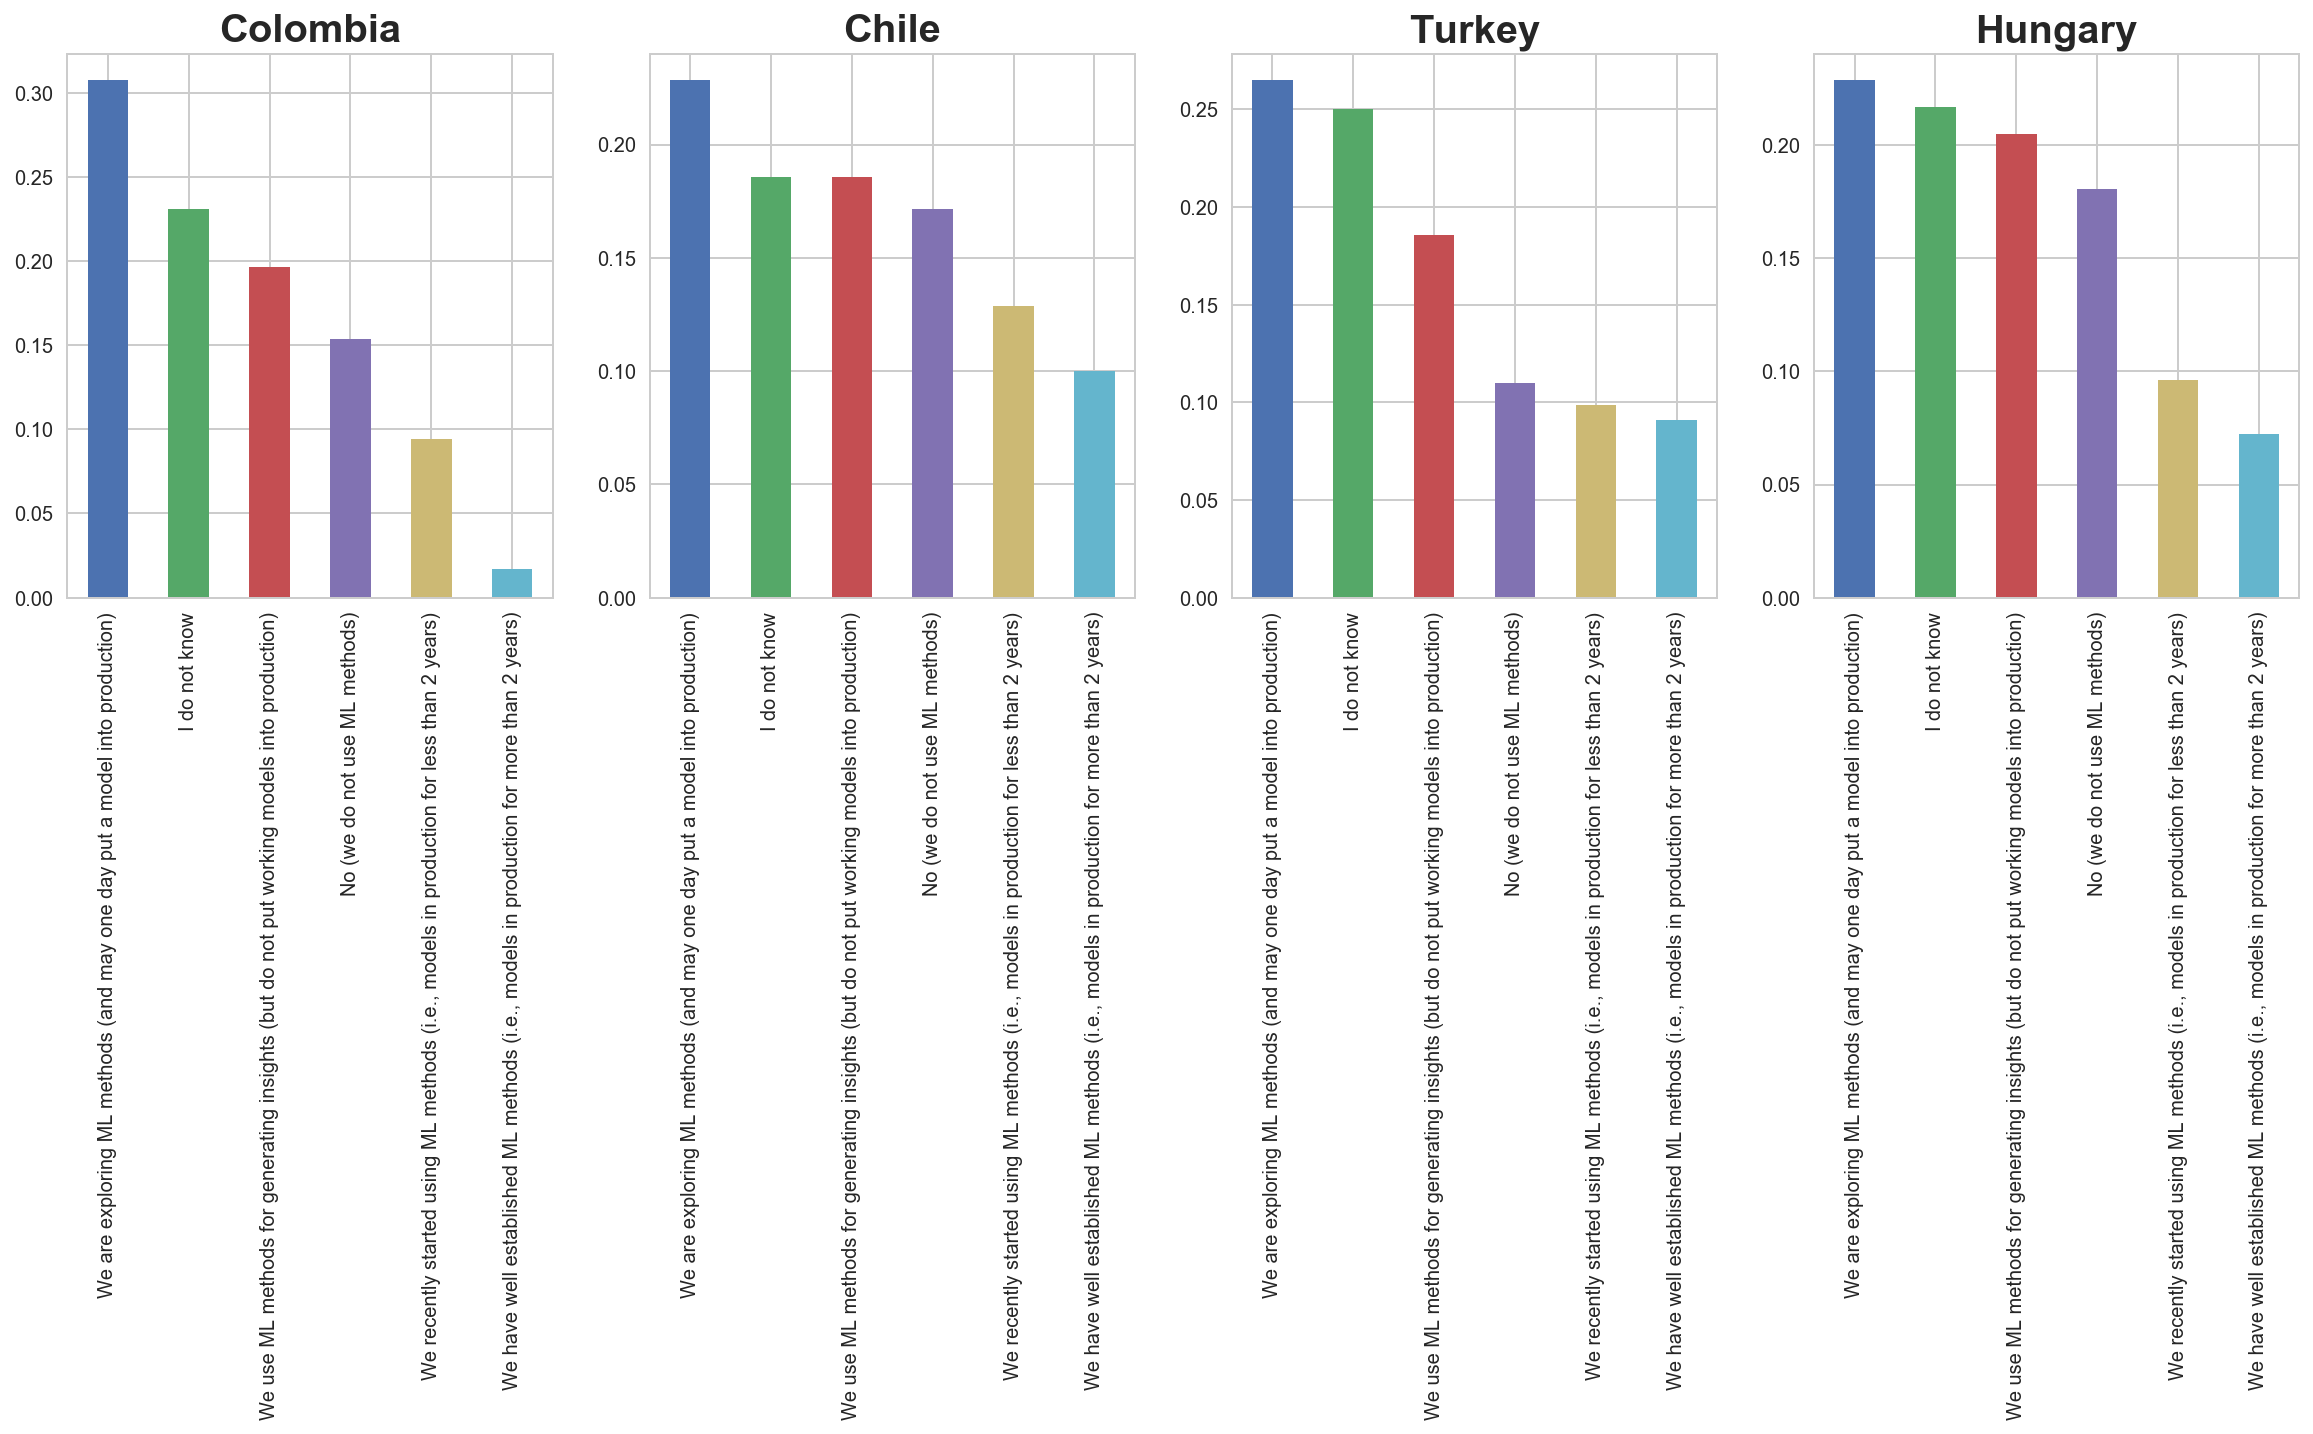

In [4]:
ks.draw_plot(10, plot_cols=4, is_use_the_same_y_lim=False)

Q10. Does your current employer incorporate machine learning methods into their business?
왼쪽에서부터 지문 내용 : 
1 We are exploring ML methods (and may one day put a model into production)
2 I do not know
3 We use ML methods for generating insights (but do not put working models into production)
4 No (we do not use ML methods)
5 We recently started using ML methods (i.e., models in production for less than 2 years)
6 We have well established ML methods (i.e., models in production for more than 2 years)


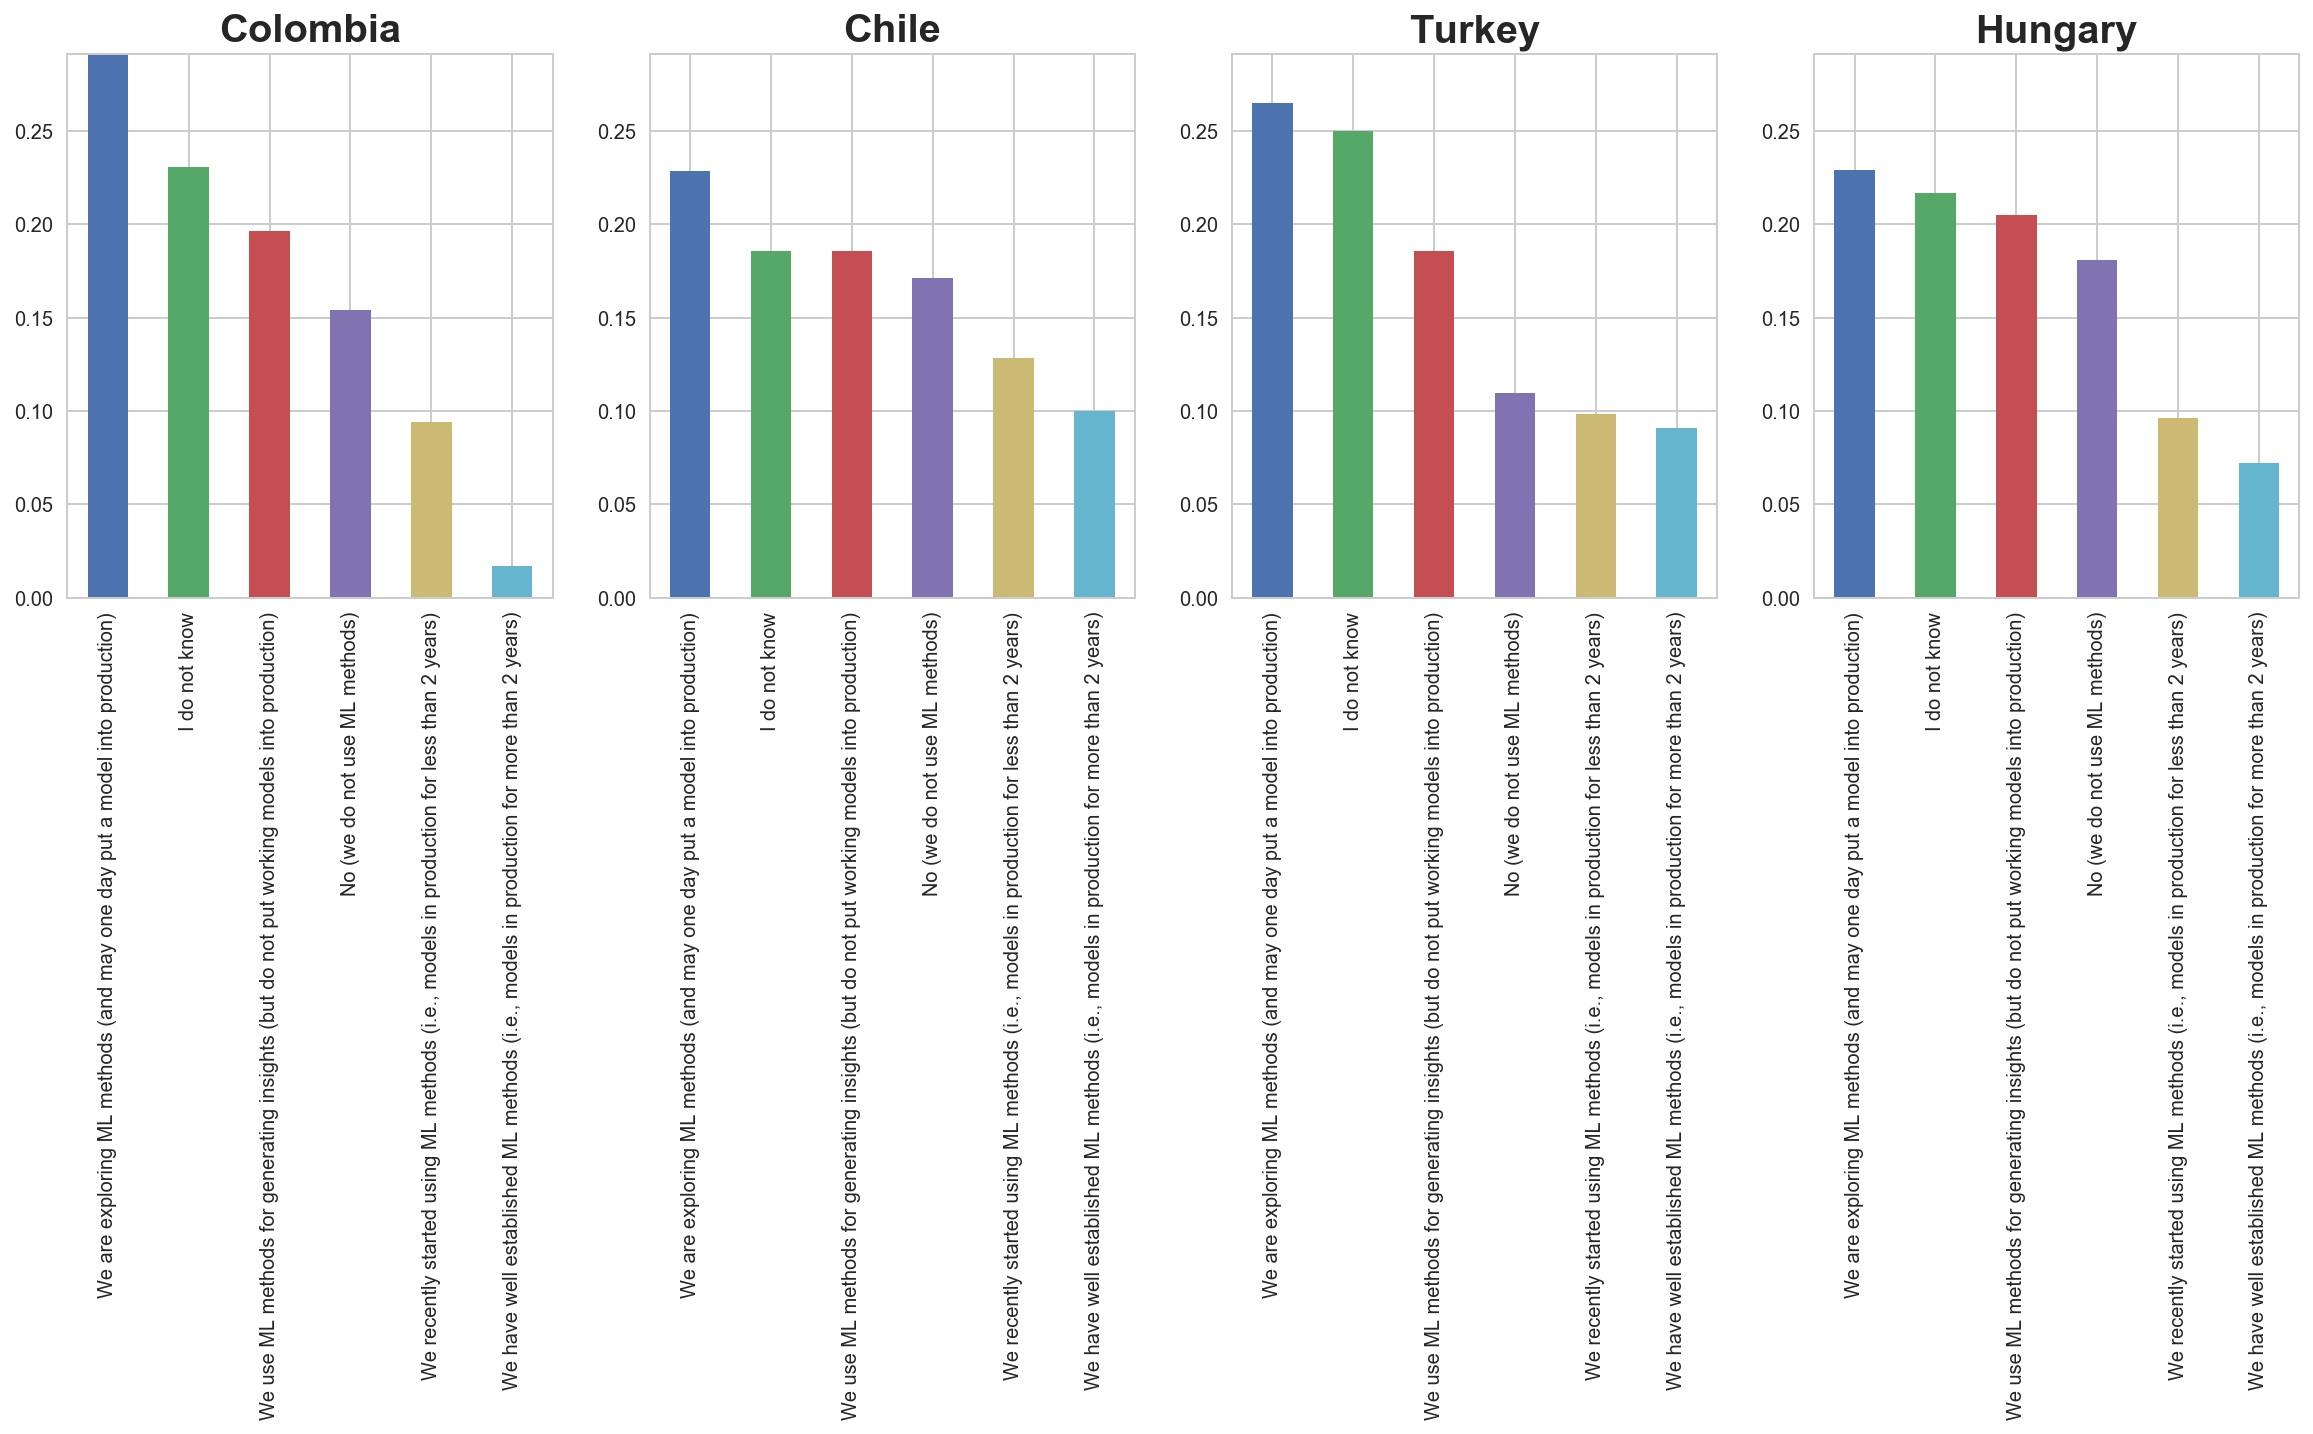

In [9]:
ks.draw_plot(10, plot_cols=4, is_use_the_same_y_lim=True, ylim_offset=0.01)

In [5]:
ks.set_df_I_want_by_country_name(['Turkey'])

In [8]:
multi_18_Turkey = ks.get_df_I_want("Turkey")

In [13]:
multi_18_Turkey.groupby("Q10").size().values/len(multi_18_Turkey)

array([0.08868502, 0.21406728, 0.14984709, 0.0733945 , 0.20183486,
       0.0795107 ])